Nama: Faishal Kamil <br>
NIM: 2502001063<br>
Mid Exam: Deep Learning

## Folder Dataset
----
https://drive.google.com/drive/folders/1SMzmBu5tPXdM_FVJElZQNUSZq84km56t?usp=share_link

## Import Libraries
----

In [ ]:
import os
import numpy as np
import cv2
from PIL import Image
from tensorflow import keras
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import shutil
import random
import tensorflow as tf
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Nomor 2
----
Chaplin sedang mempelajari Batik Indonesia. Dia ingin membuat sebuah aplikasi sederhana untuk mengklasifikasikan jenis-jenis batik ini. Kemudian dia mengumpulkan data batik tersebut sebagai berikut: Dataset batik Indonesia dapat diunduh di: https://tinyurl.com/UTSDeepLearningNo2 dan saya mendapatkan dataset 2C.<br> Perintah soal diminta untuk membantu Chaplin dalam melakukan klasifikasi ini. Setiap mahasiswa mendapatkan dataset yang terdiri dari 5 kelas batik. Setelah mengunduh dataset yang sesuai untuk anda, kemudian buatlah arsitektur Convolutional Neural Network untuk permasalahan Image multiclass classification ini dengan beberapa ketentuan berikut:

a) Lakukan eksplorasi terhadap data tersebut dengan melihat histogram warnanya
dan lakukan proses augmentasi data jika diperlukan. Dan kemudian lakukan resize resolusi gambar menjadi 64 x 64

- Batik Priangan


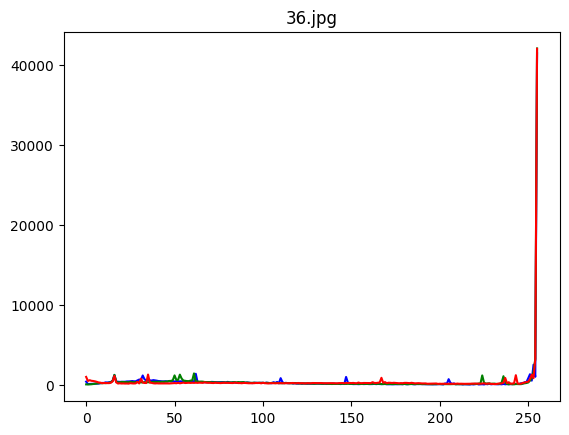

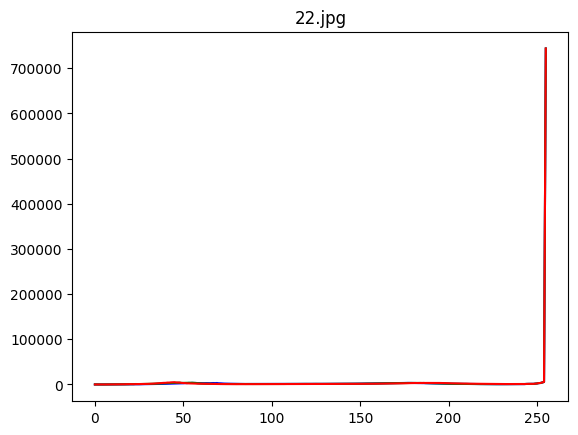

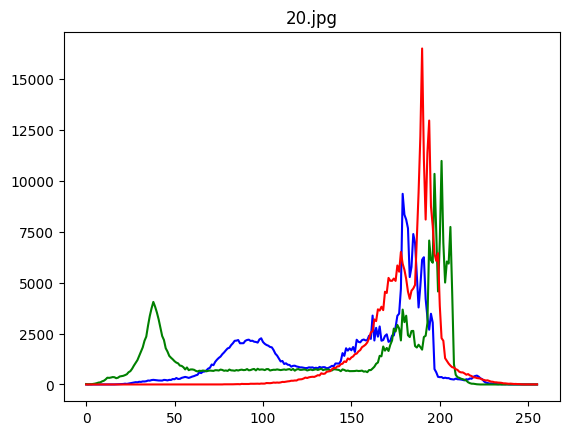

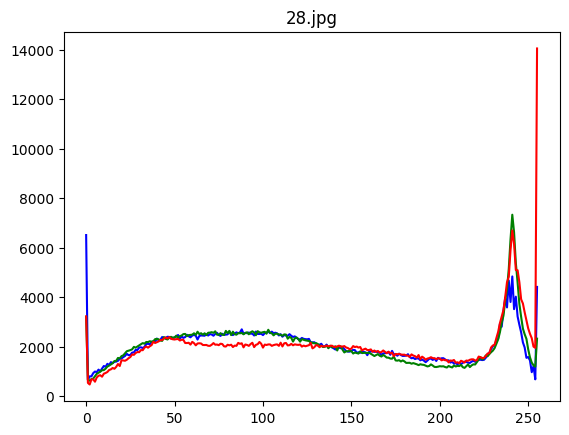

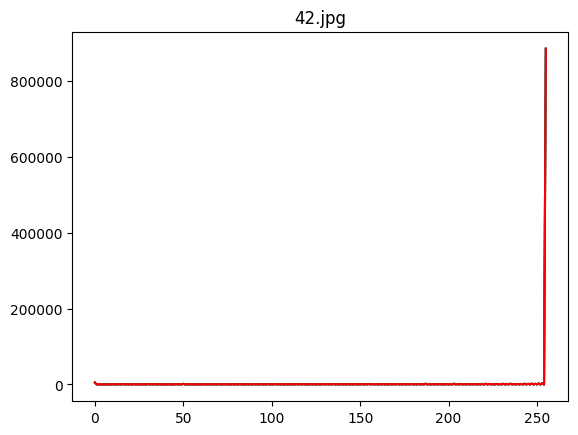

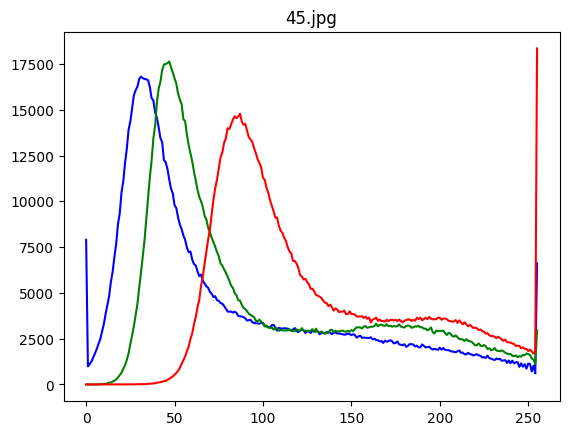

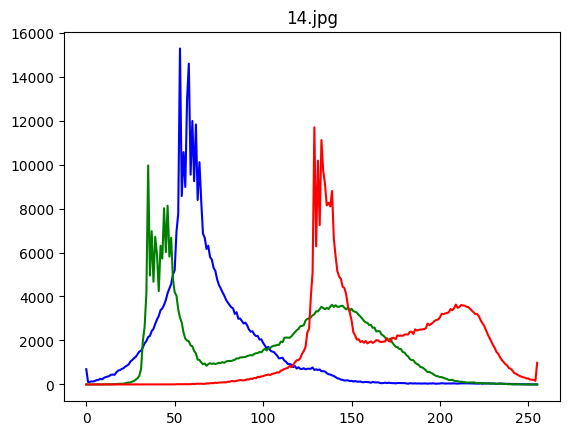

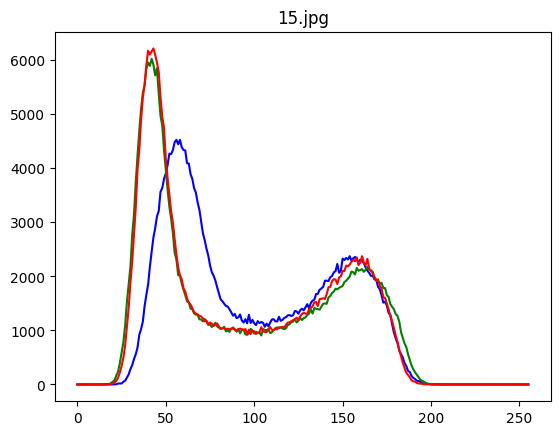

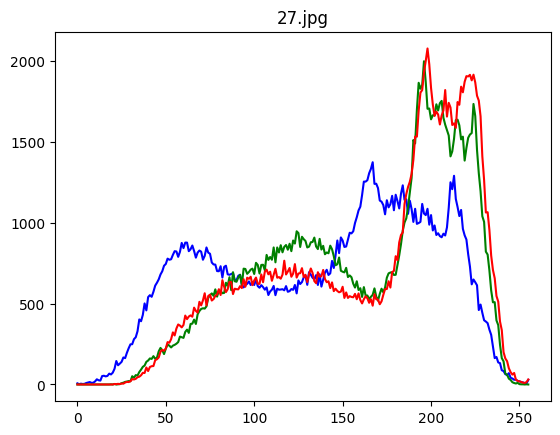

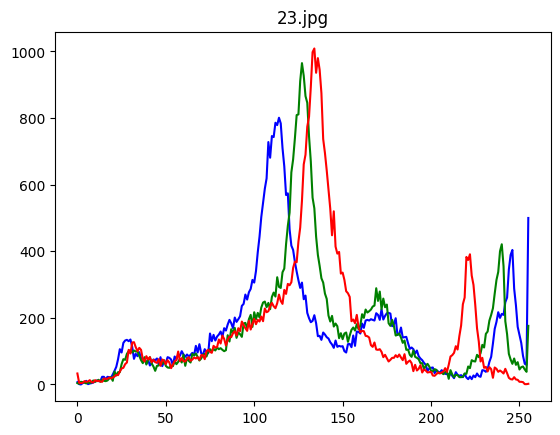

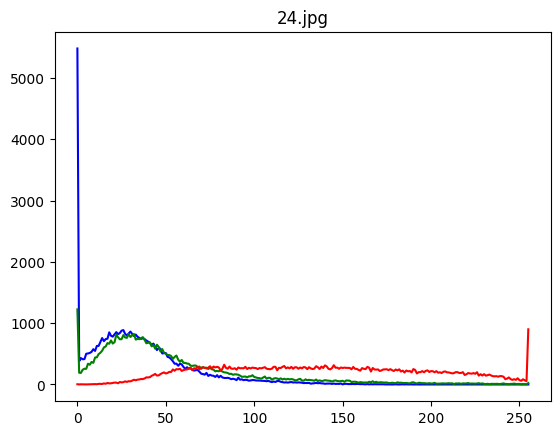

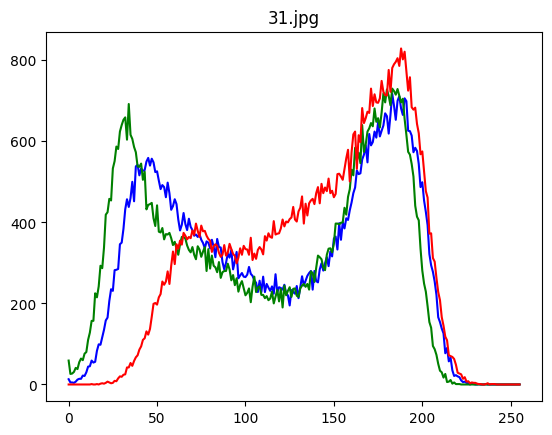

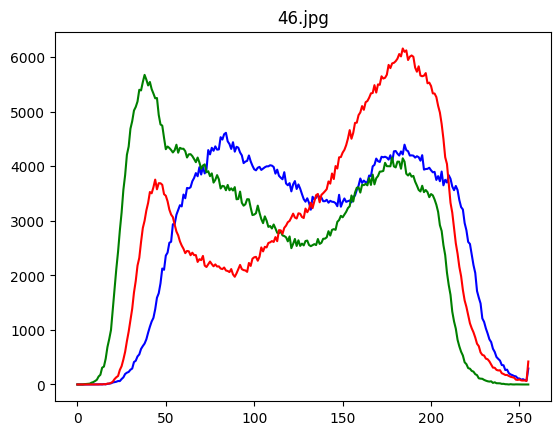

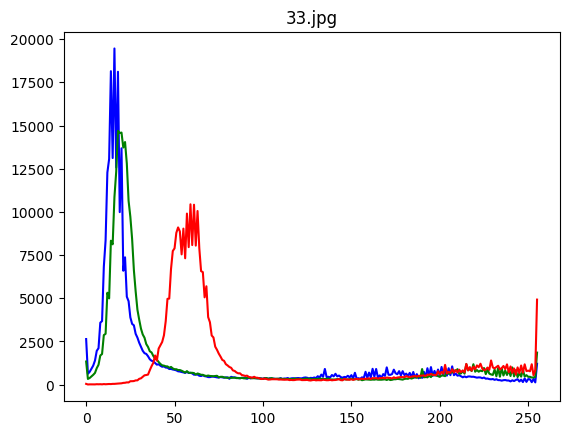

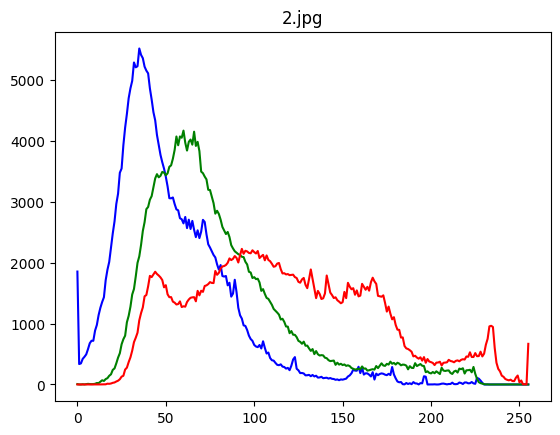

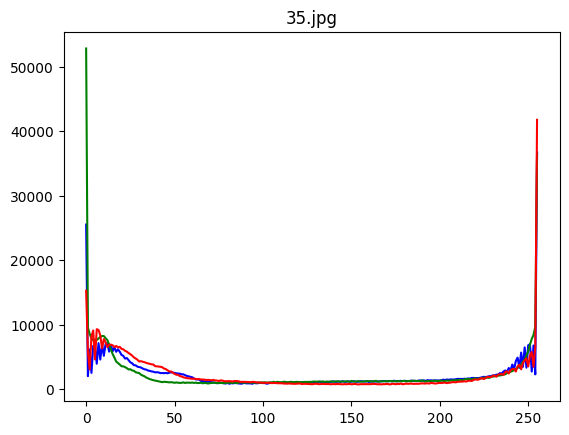

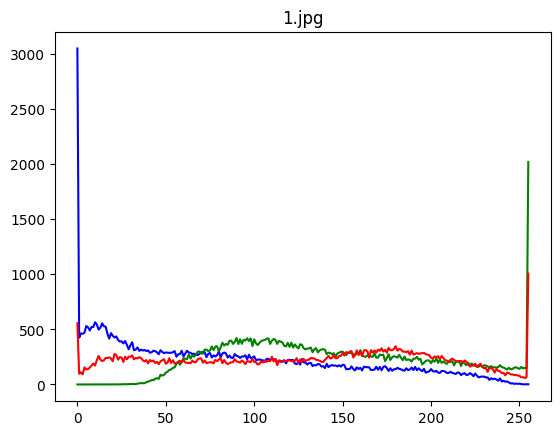

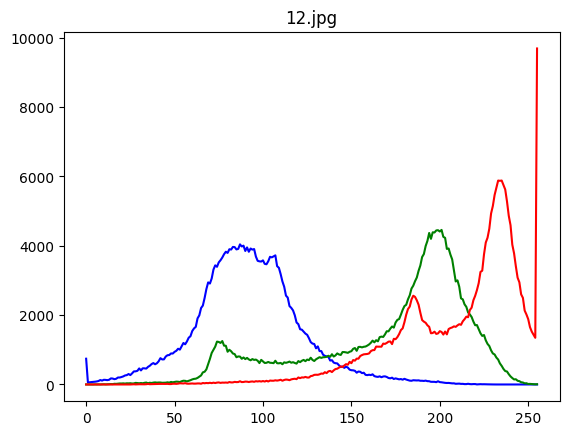

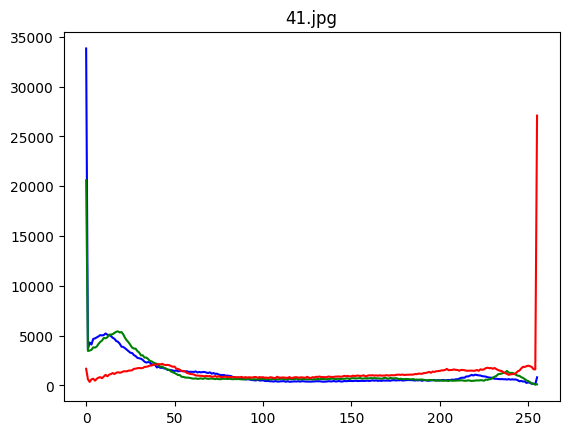

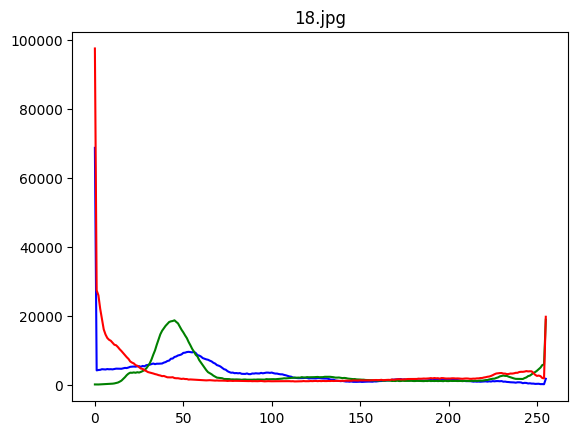

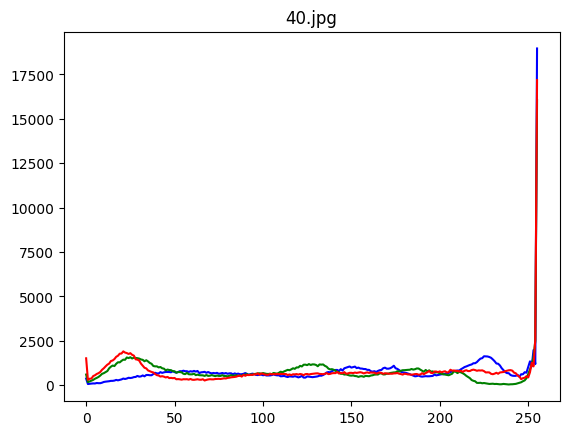

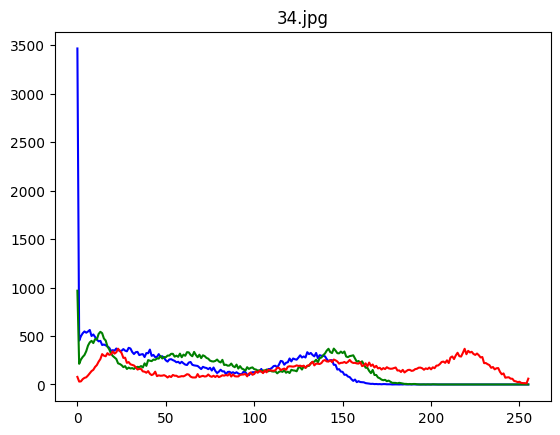

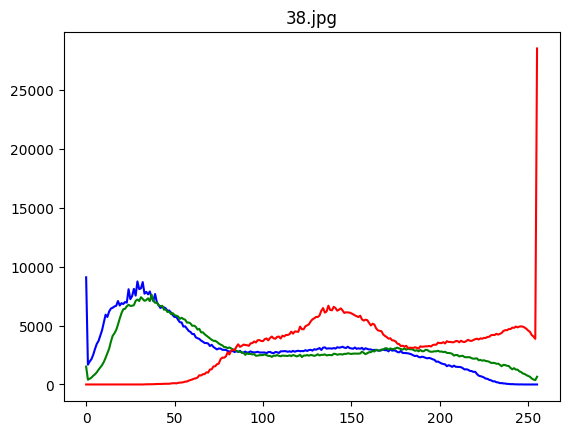

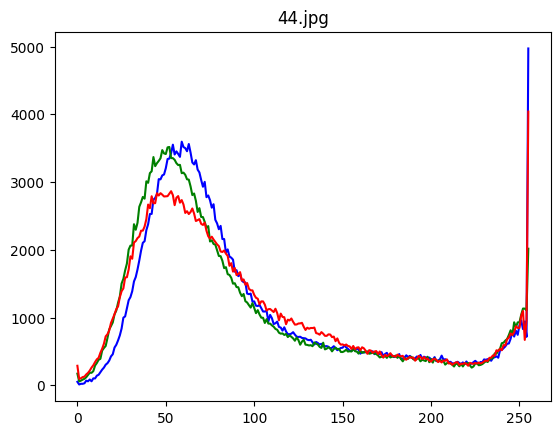

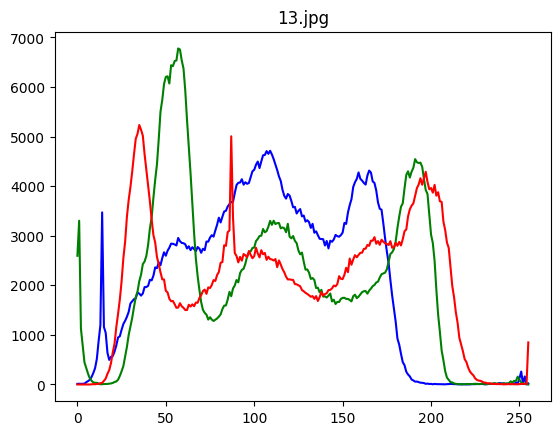

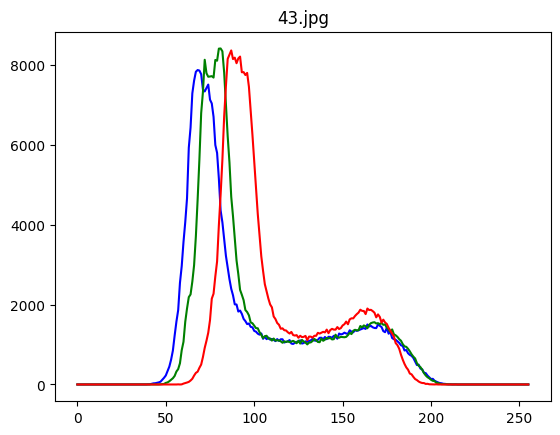

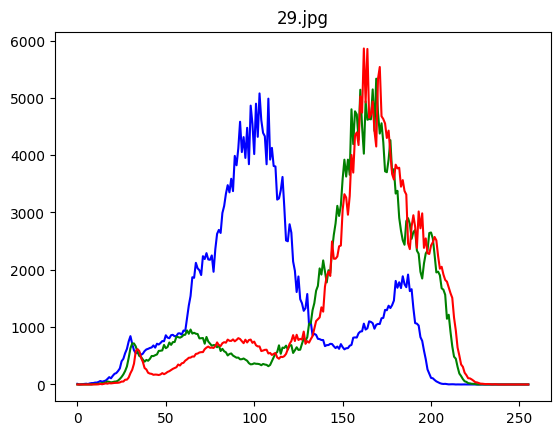

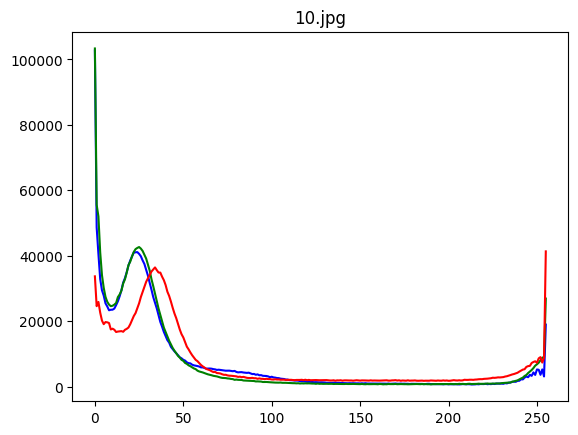

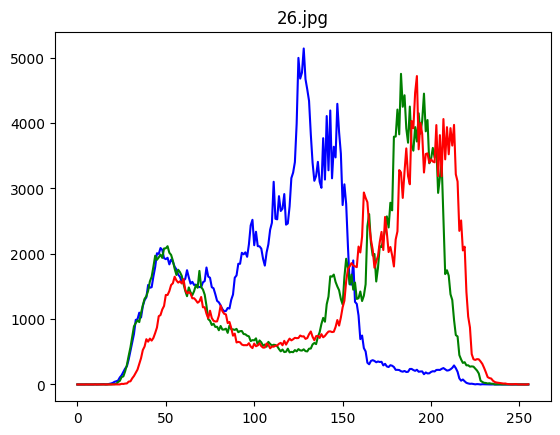

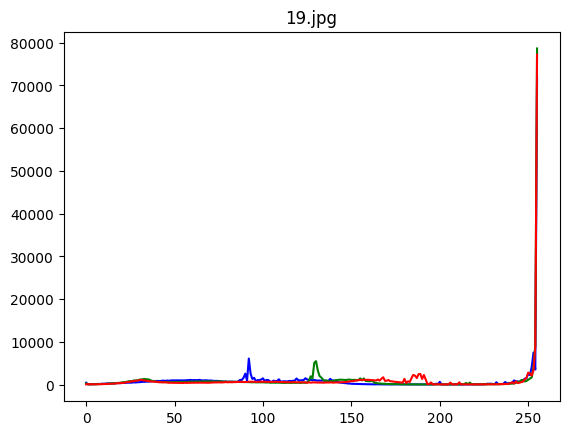

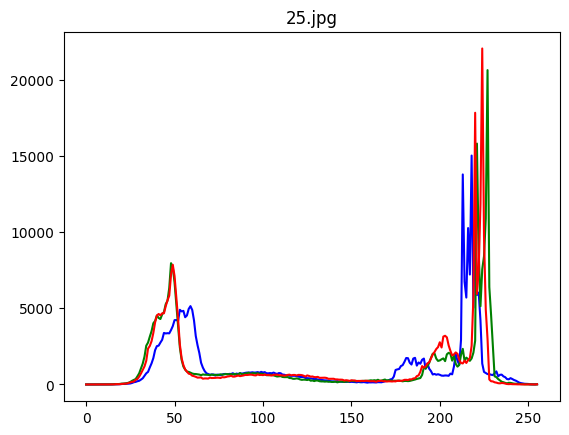

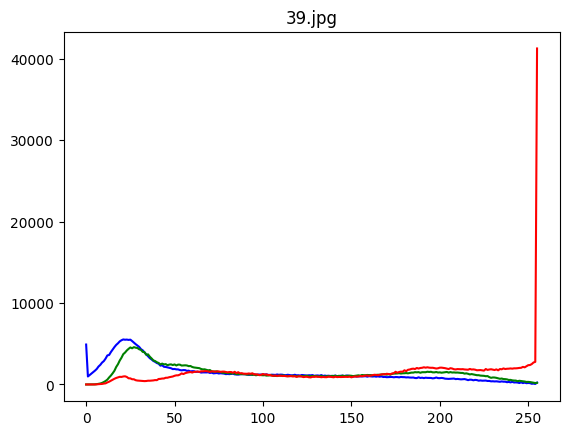

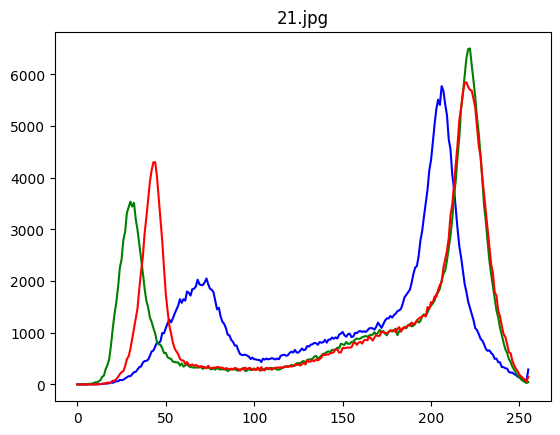

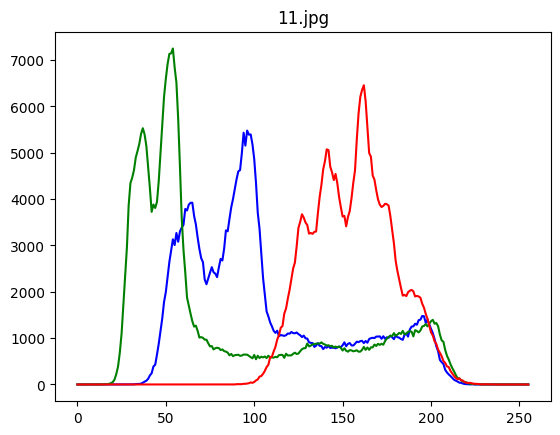

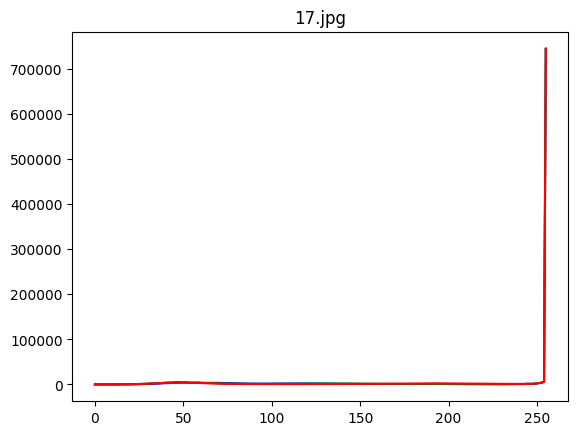

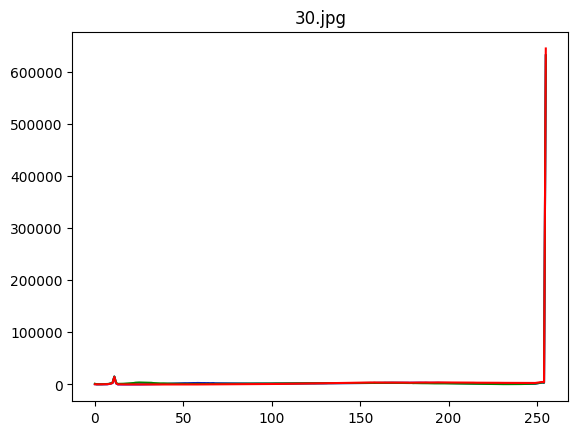

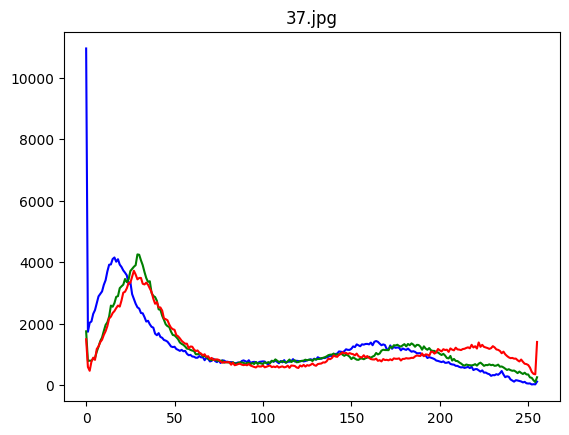

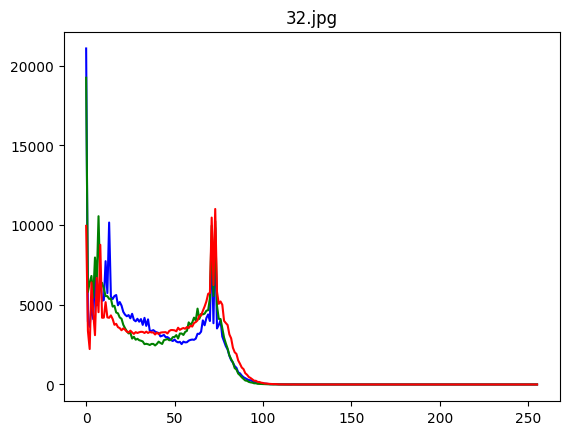

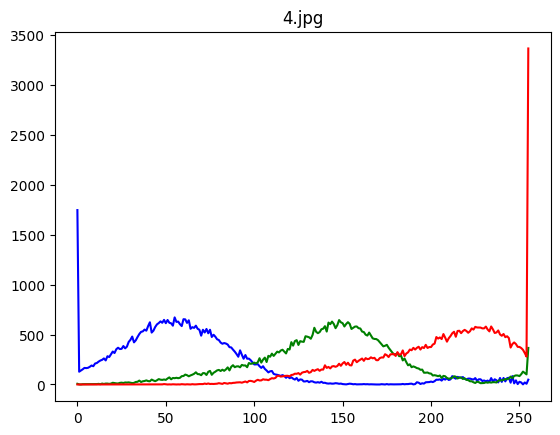

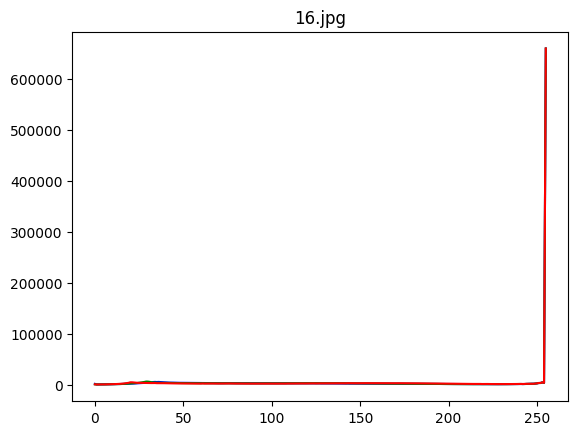

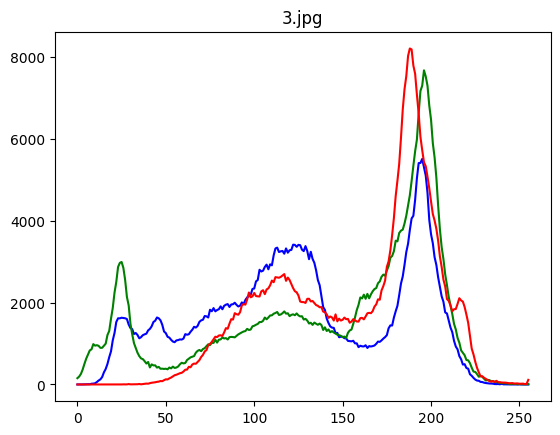

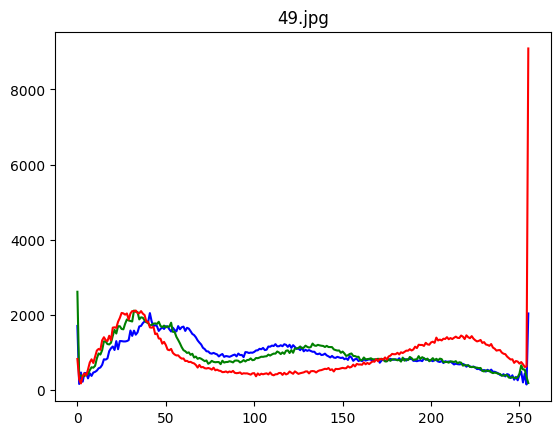

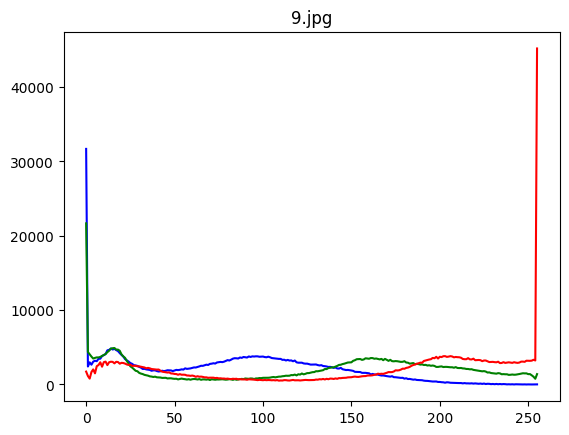

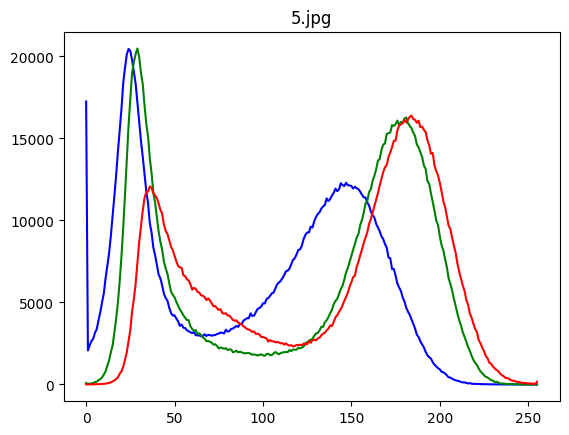

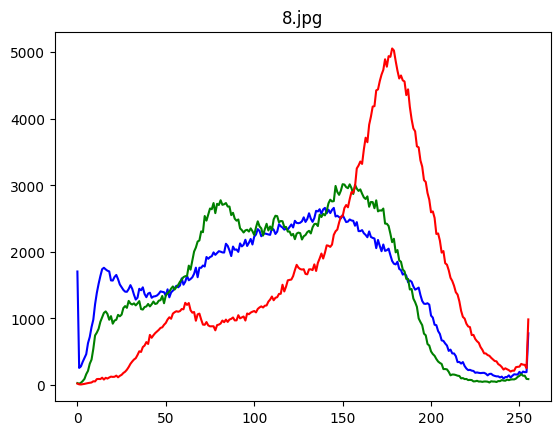

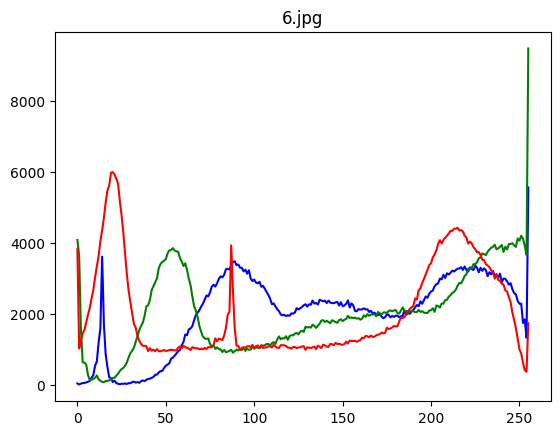

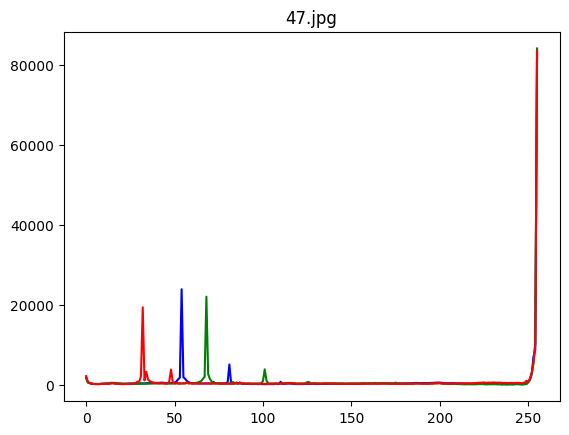

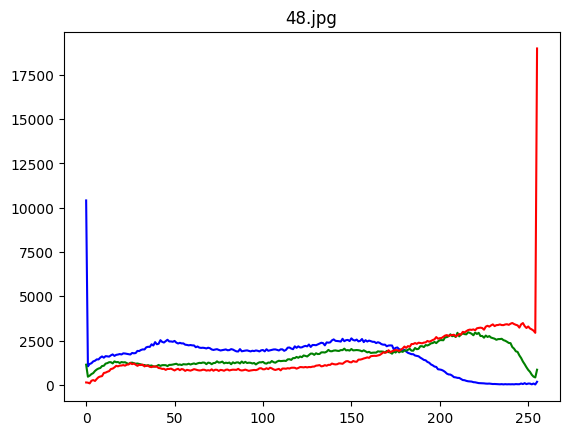

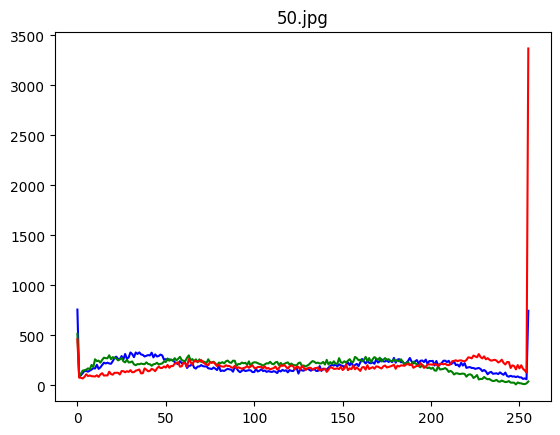

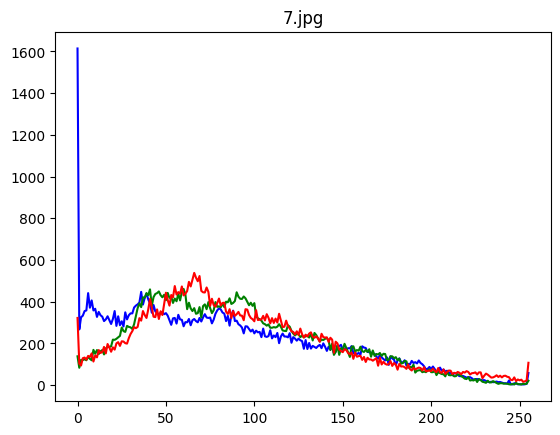

In [ ]:
# Histogram
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-priangan"

for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    color = ('b','g','r')
    for i,col in enumerate(color):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist,color = col)
    plt.title(filename)
    plt.show()


In [ ]:
# augmentasi
# inisialisasi ImageDataGenerator dengan konfigurasi augmentasi yang diinginkan
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# load gambar dari folder
folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-priangan"
img_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]

# load gambar dan lakukan augmentasi
for img_path in img_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ubah dari format BGR menjadi RGB
    img = img.reshape((1,) + img.shape)  # tambahkan dimensi batch
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir='/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/augmented/batik-priangan', save_prefix='augmented_', save_format='jpg'):
        i += 1
        if i > 5:  # lakukan augmentasi sebanyak 5 kali
            break


In [ ]:
# RESIZE 64x64

import os
from PIL import Image

# path to the original images
original_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/augmented/batik-priangan"

# path to the resized images
resized_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/resize/priangan_path"

# create the resized folder if it doesn't exist
if not os.path.exists(resized_path):
    os.makedirs(resized_path)

# loop through each image in the original folder and resize it
for image_name in os.listdir(original_path):
    img_path = os.path.join(original_path, image_name)
    with Image.open(img_path) as img:
        img = img.convert('RGB')
        img = img.resize((64, 64))
        new_path = os.path.join(resized_path, image_name.split('.')[0] + '.jpeg')
        img.save(new_path, 'JPEG')

- batik pekalongan

In [ ]:
# Histogram
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-pekalongan"

for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    color = ('b','g','r')
    for i,col in enumerate(color):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist,color = col)
    plt.title(filename)
    plt.show()


In [ ]:
# augmentasi
# inisialisasi ImageDataGenerator dengan konfigurasi augmentasi yang diinginkan
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# load gambar dari folder
folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-pekalongan"
img_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]

# load gambar dan lakukan augmentasi
for img_path in img_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ubah dari format BGR menjadi RGB
    img = img.reshape((1,) + img.shape)  # tambahkan dimensi batch
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir='/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/augmented/batik-pekalongan', save_prefix='augmented_', save_format='jpg'):
        i += 1
        if i > 5:  # lakukan augmentasi sebanyak 5 kali
            break


In [ ]:
# RESIZE 64x64

import os
from PIL import Image

# path to the original images
original_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/augmented/batik-pekalongan"

# path to the resized images
resized_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/resize/batik-pekalongan"

# create the resized folder if it doesn't exist
if not os.path.exists(resized_path):
    os.makedirs(resized_path)

# loop through each image in the original folder and resize it
for image_name in os.listdir(original_path):
    img_path = os.path.join(original_path, image_name)
    with Image.open(img_path) as img:
        img = img.convert('RGB')
        img = img.resize((64, 64))
        new_path = os.path.join(resized_path, image_name.split('.')[0] + '.jpeg')
        img.save(new_path, 'JPEG')

- batik parang

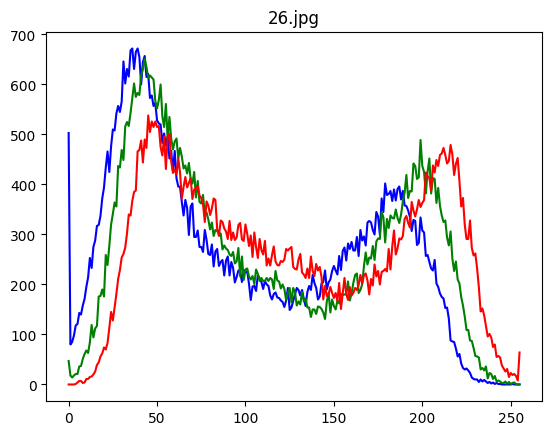

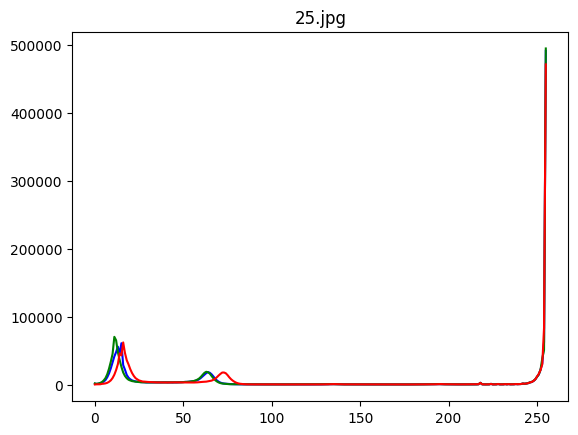

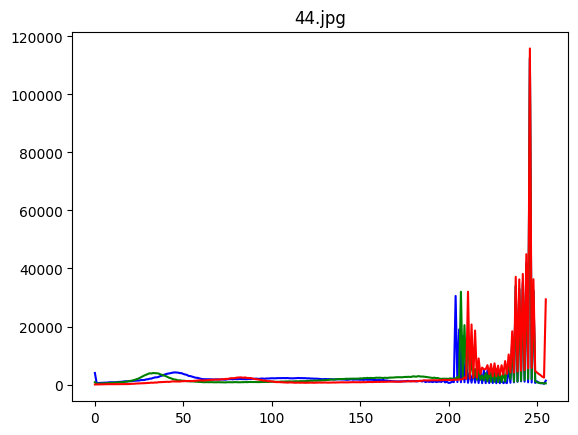

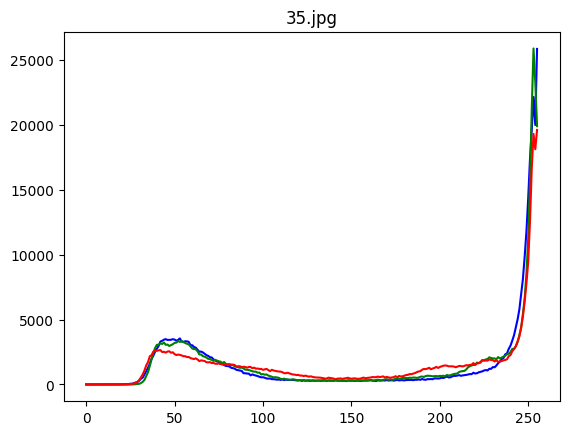

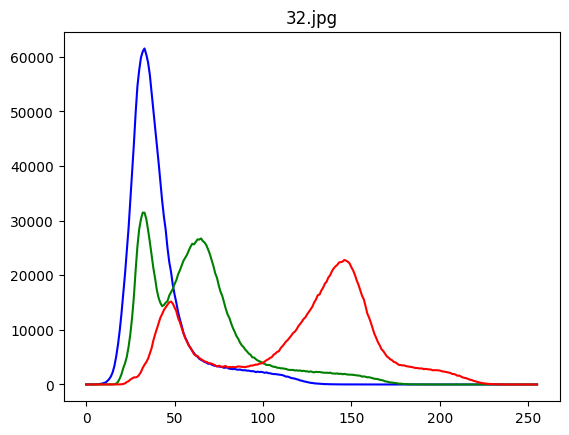

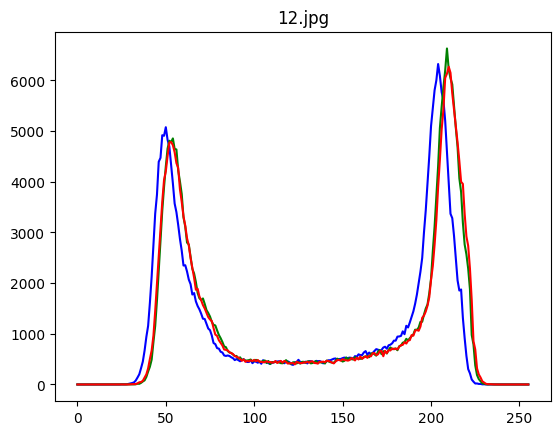

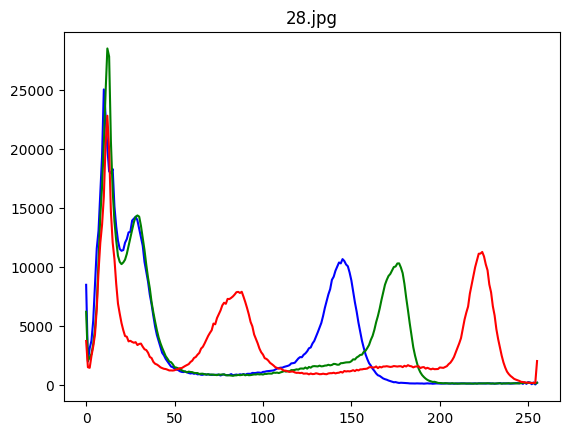

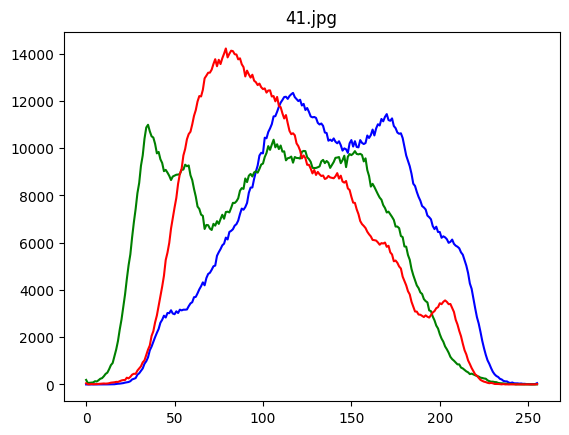

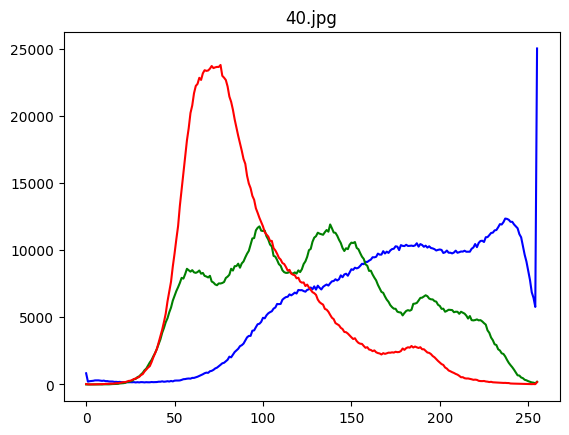

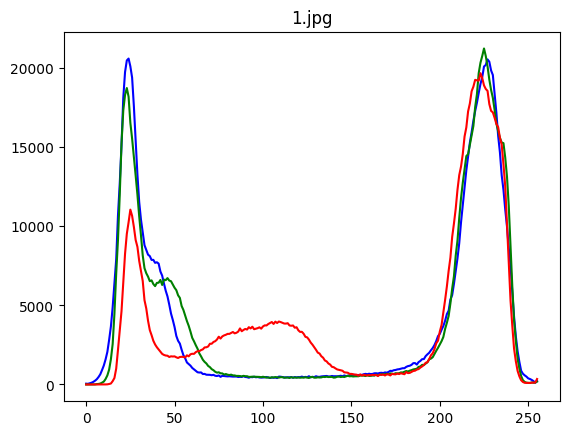

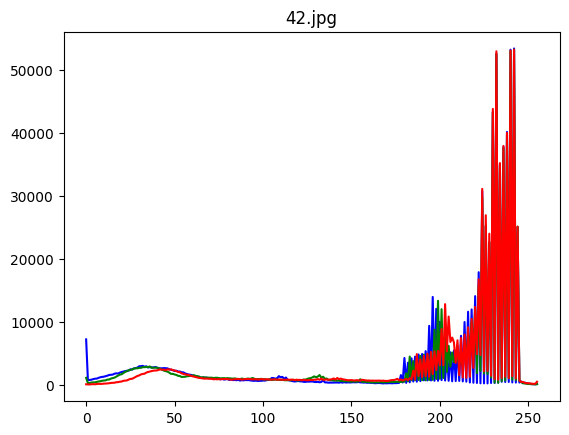

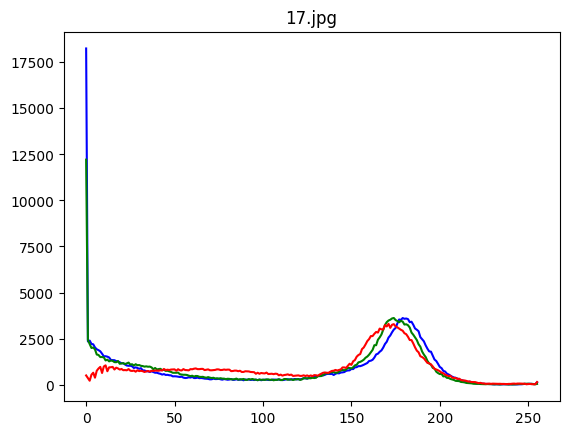

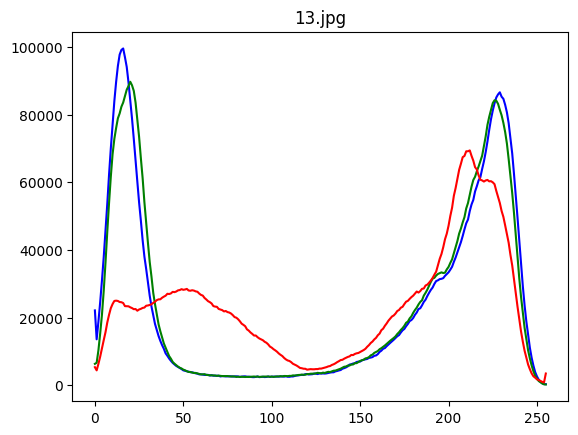

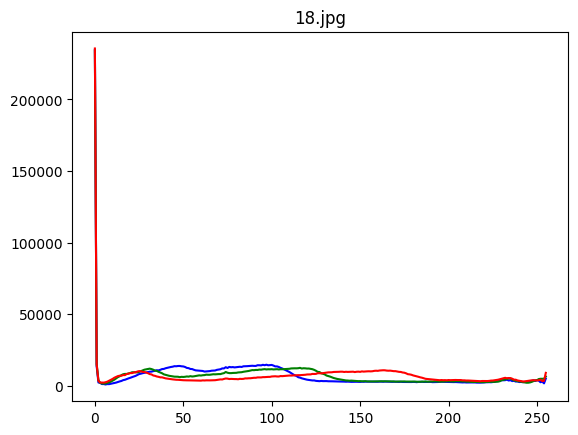

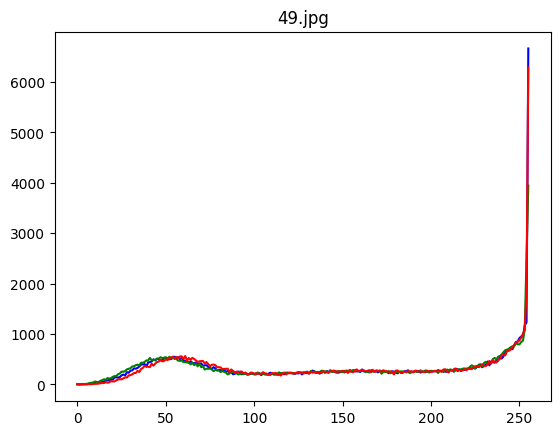

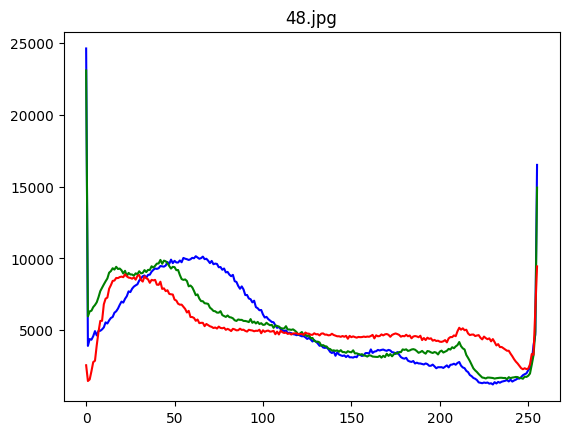

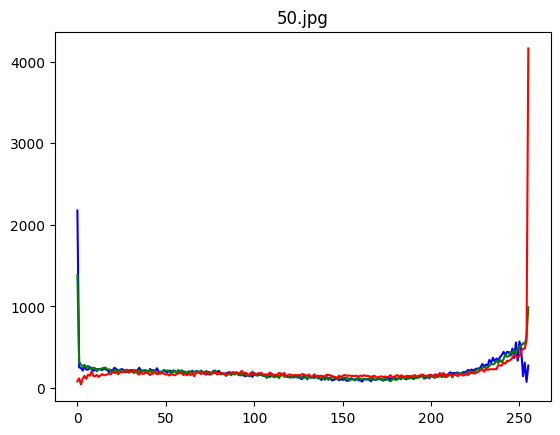

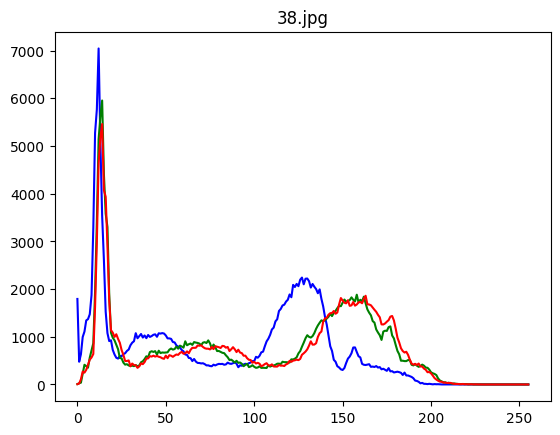

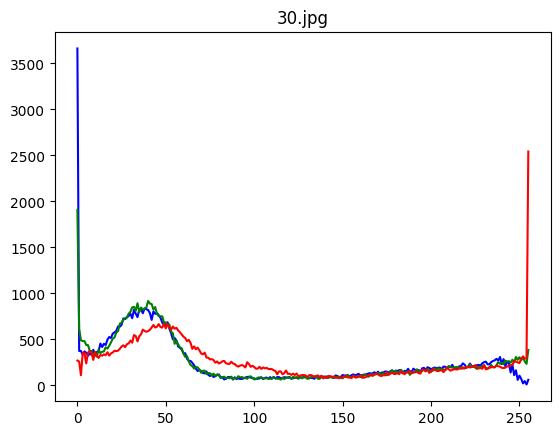

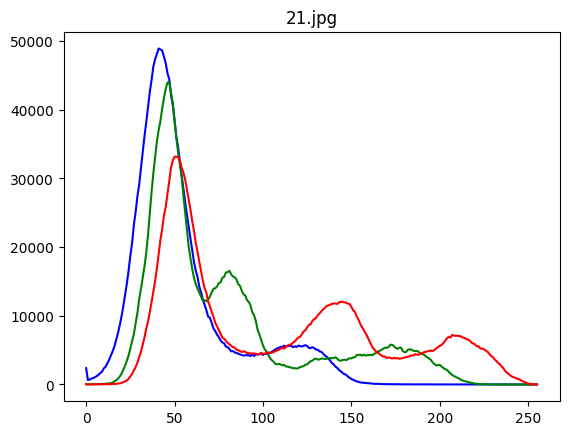

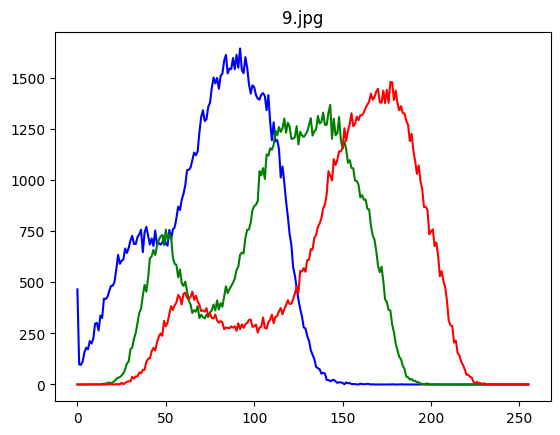

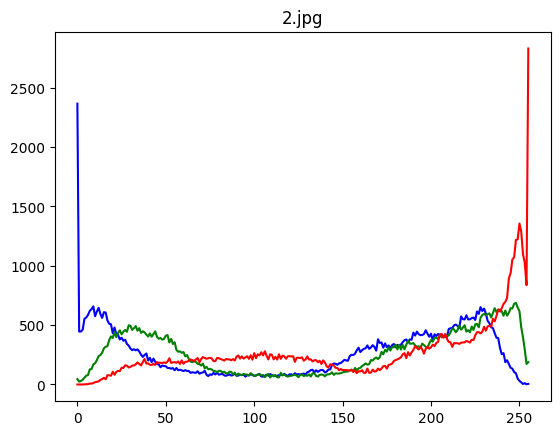

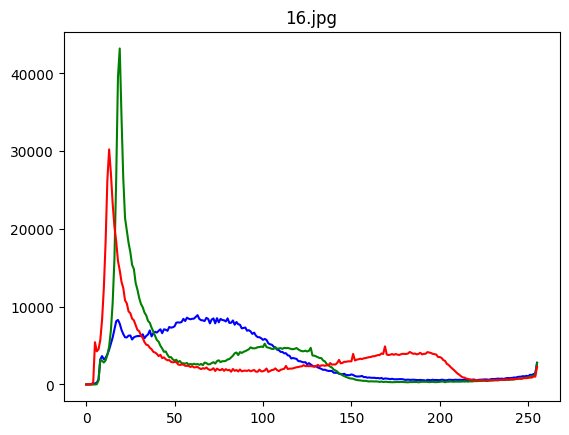

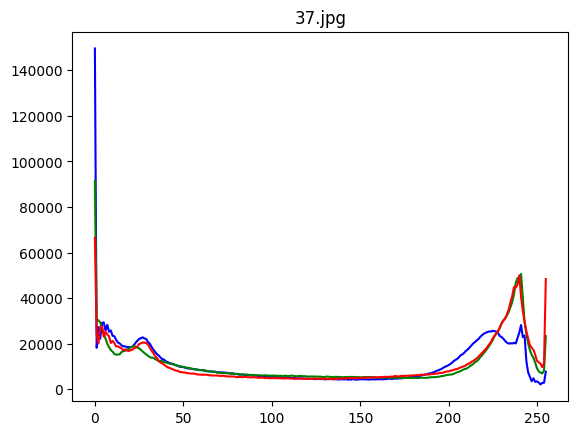

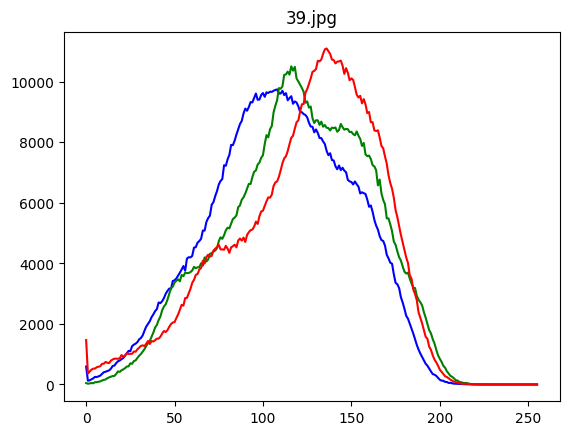

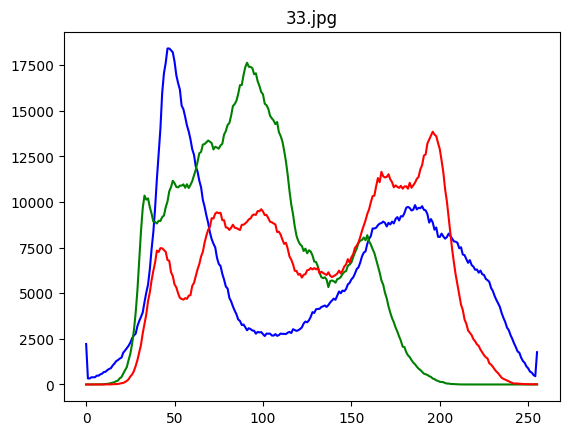

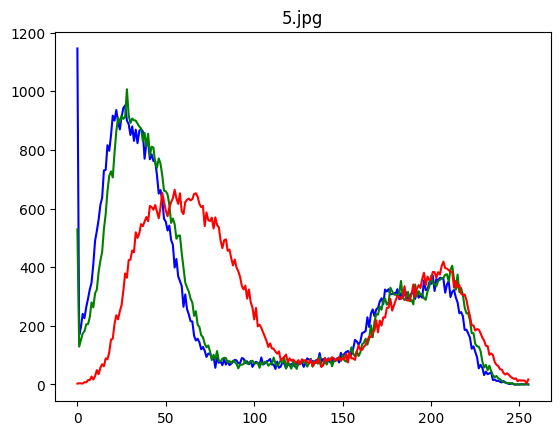

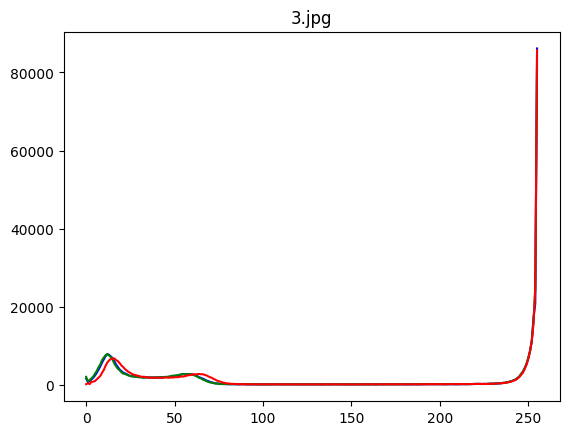

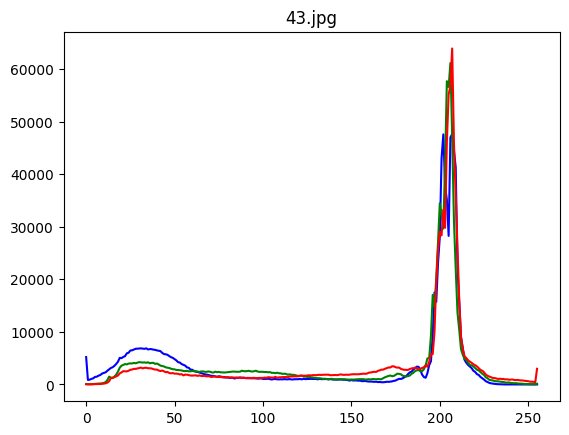

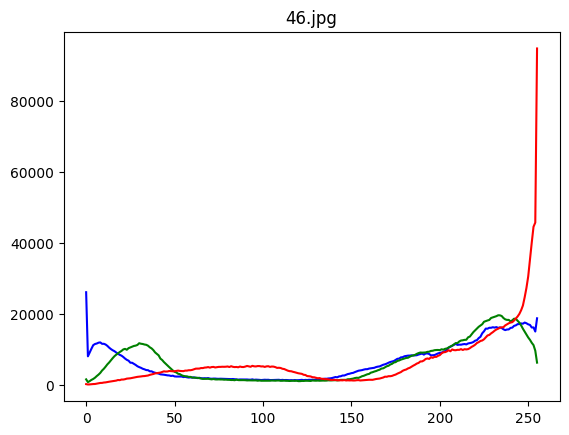

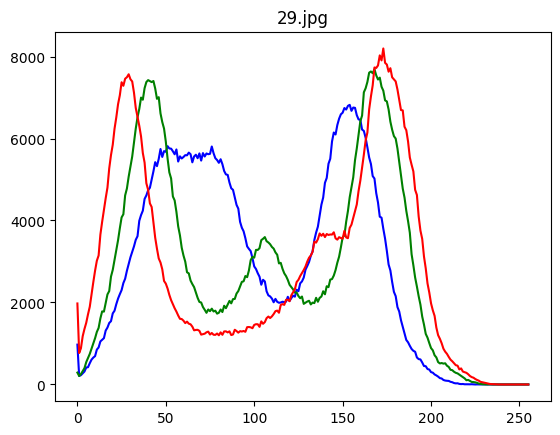

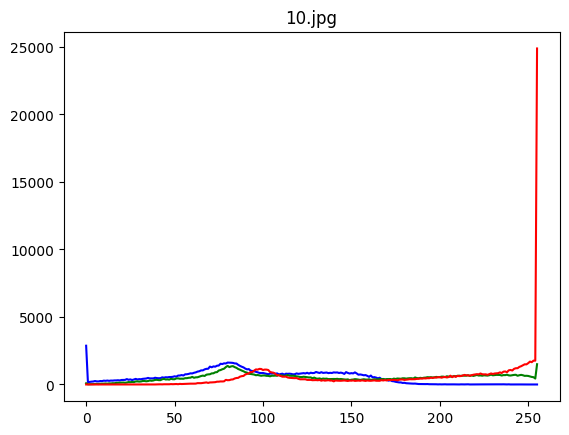

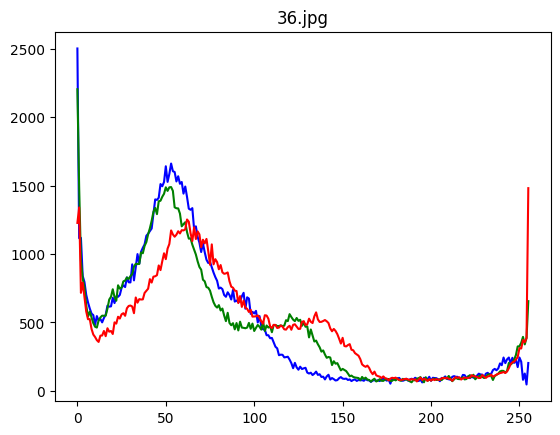

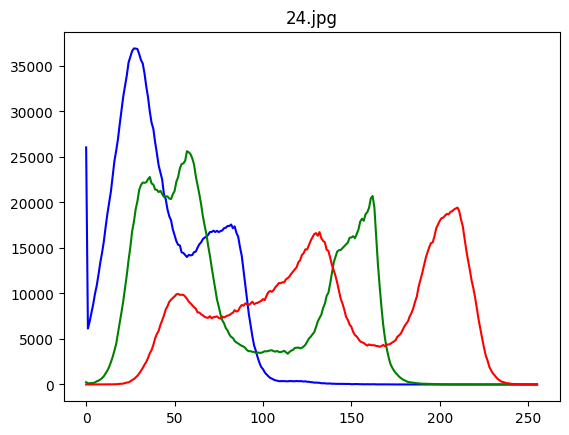

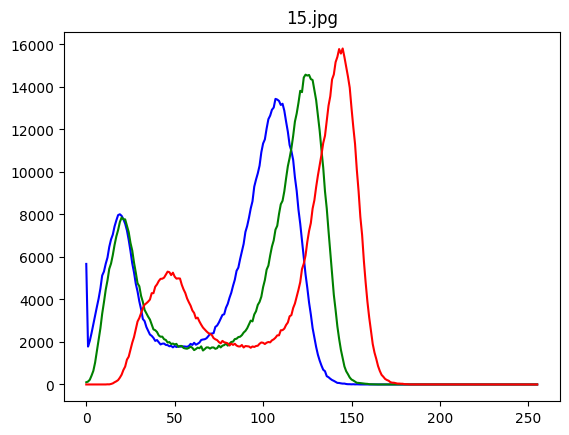

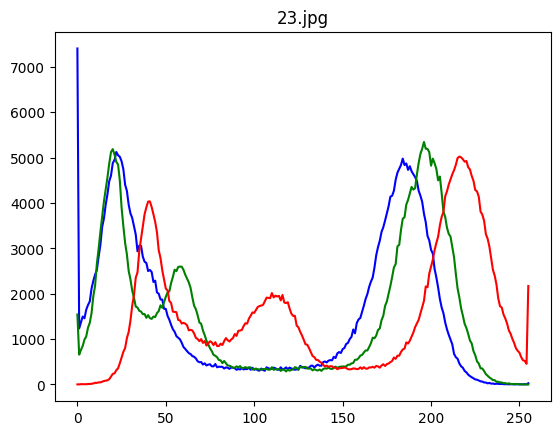

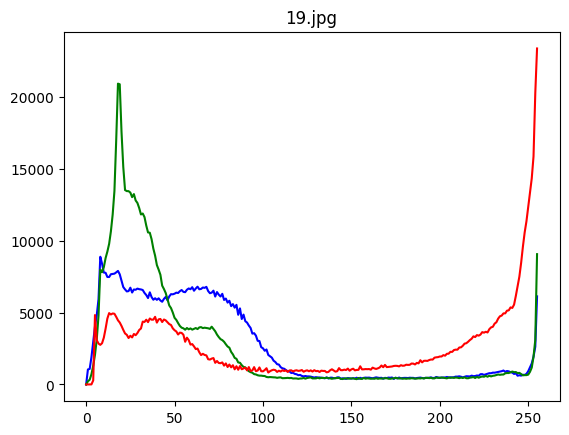

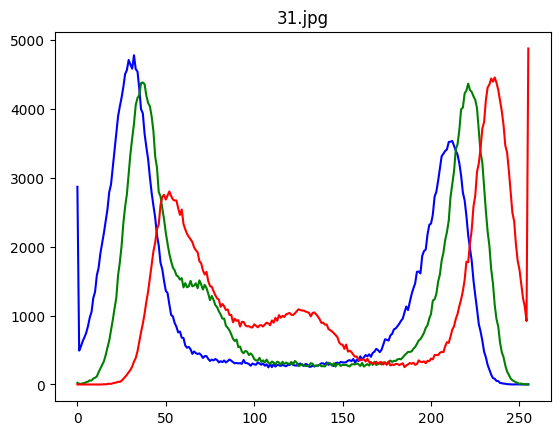

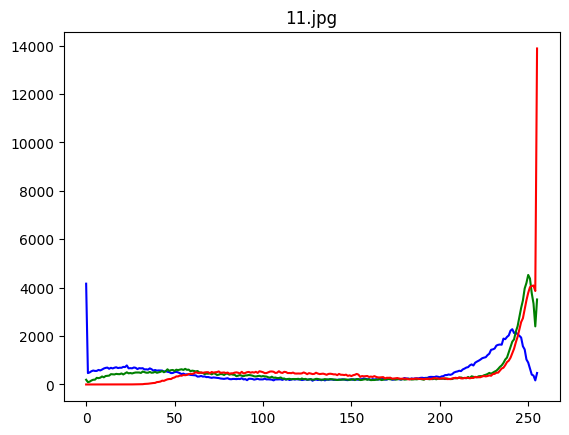

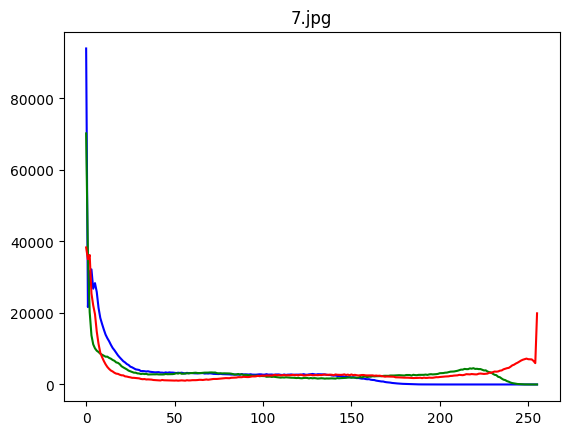

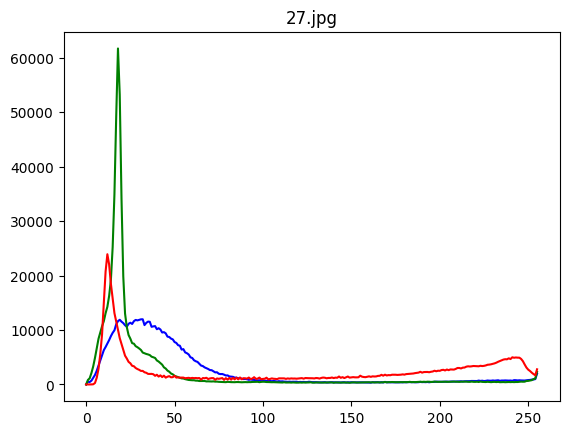

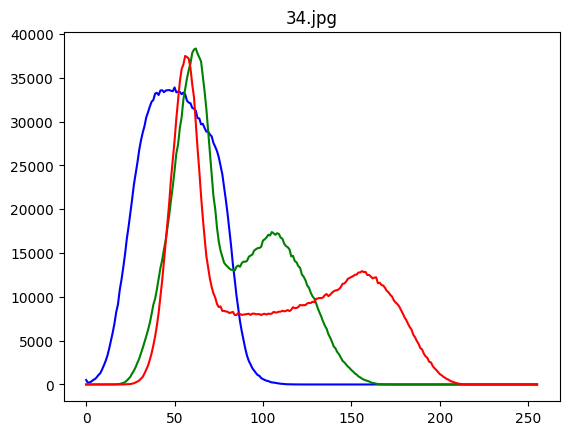

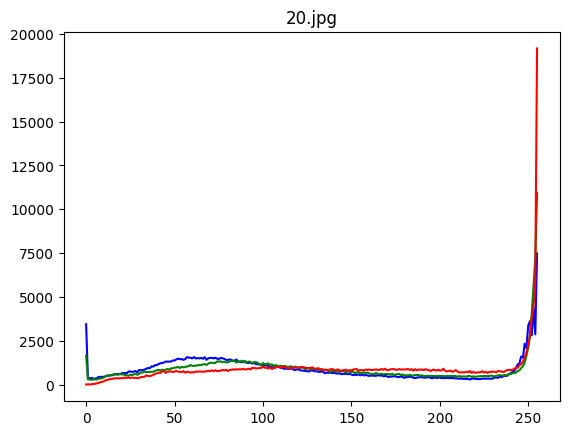

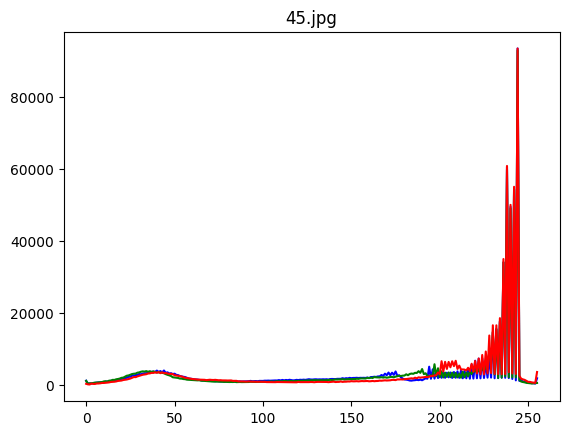

error: ignored

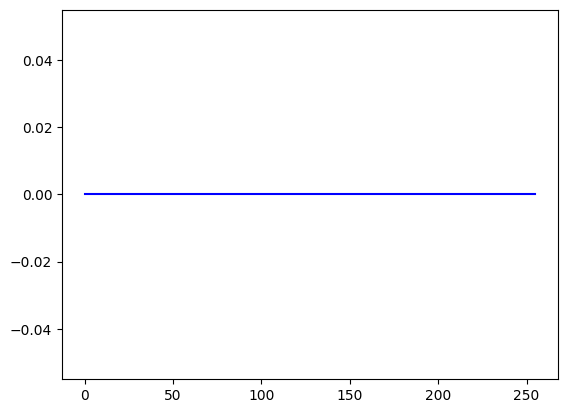

In [ ]:
# Histogram
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-parang"

for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    color = ('b','g','r')
    for i,col in enumerate(color):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist,color = col)
    plt.title(filename)
    plt.show()


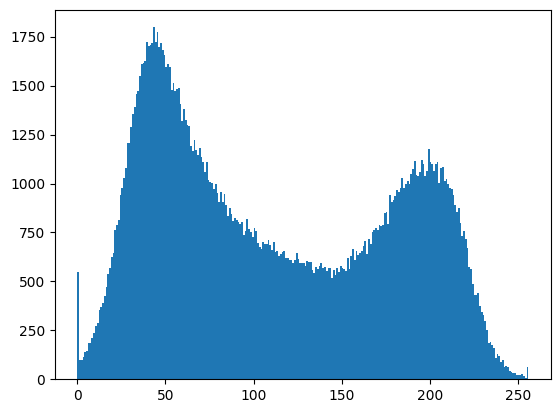

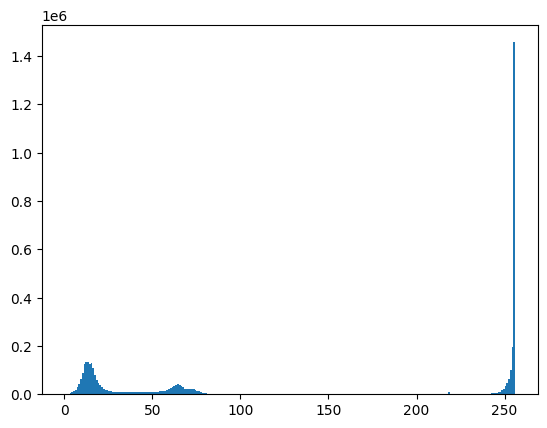

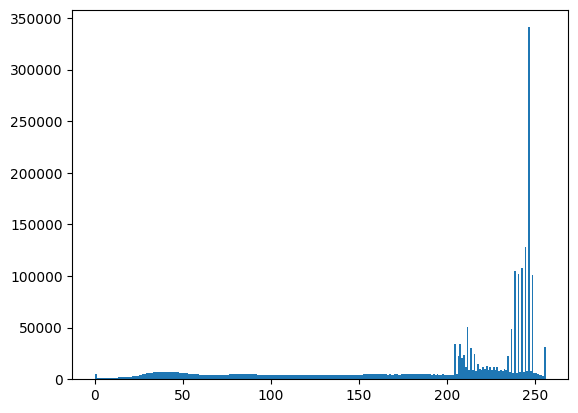

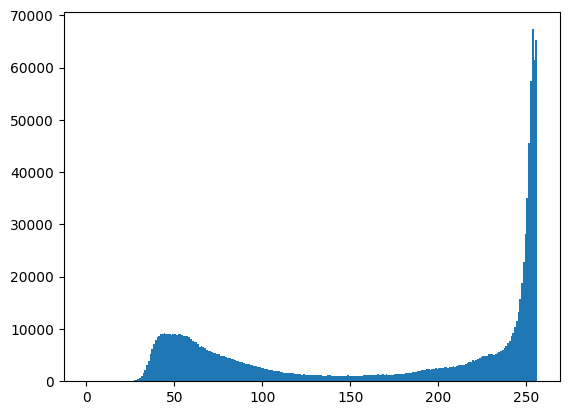

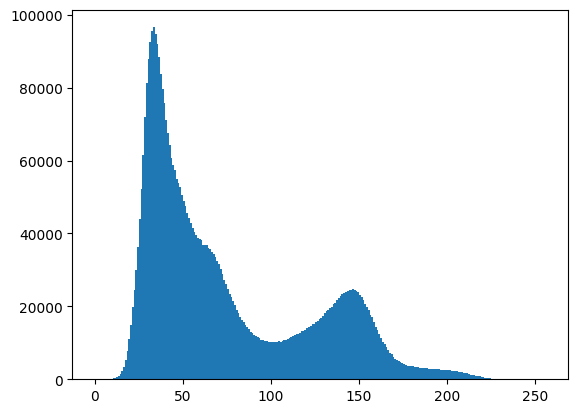

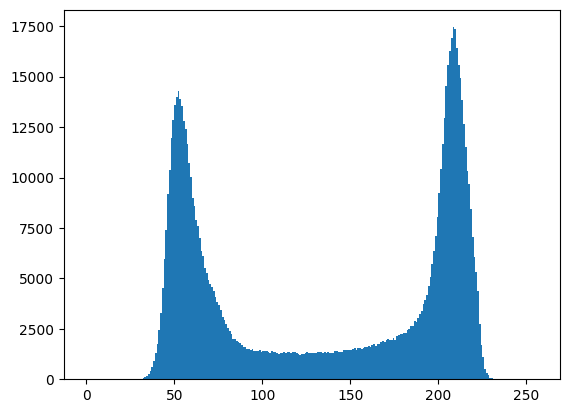

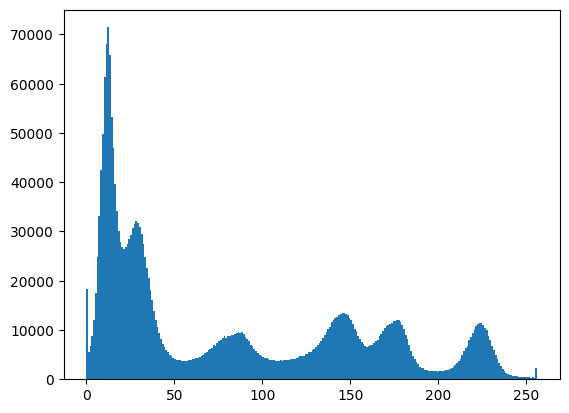

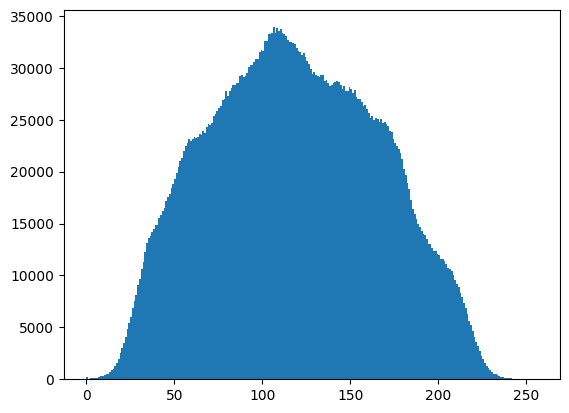

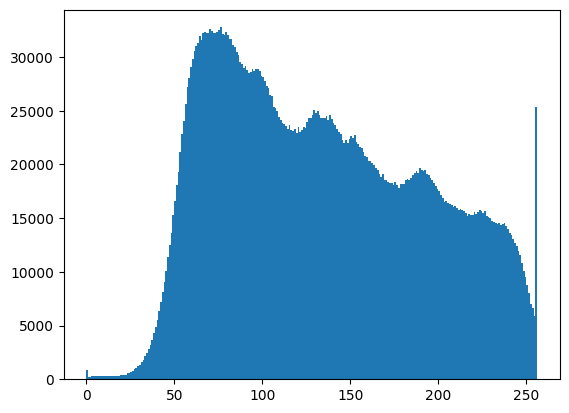

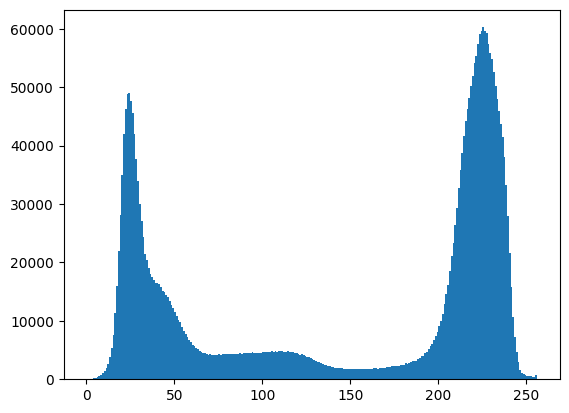

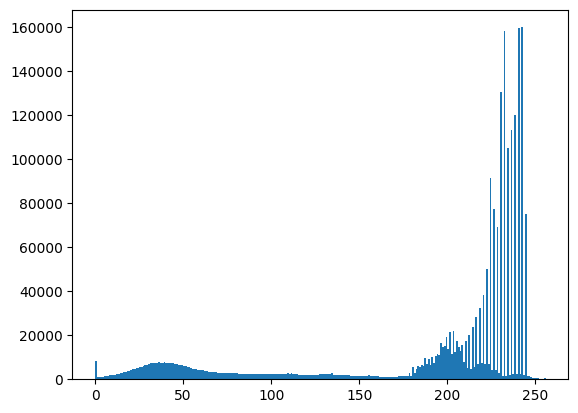

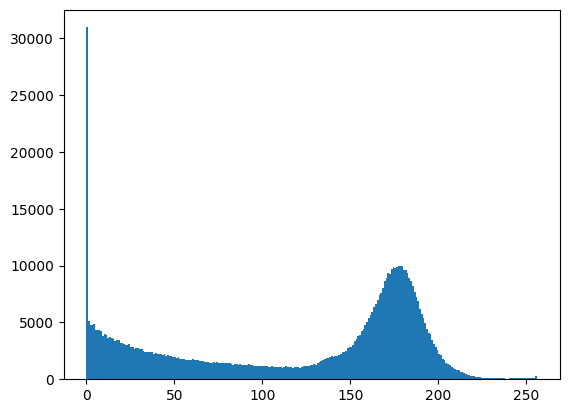

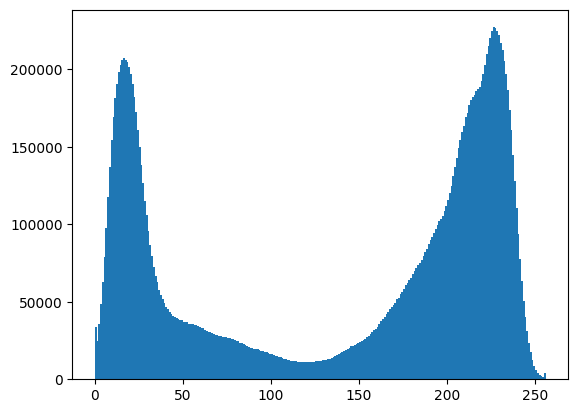

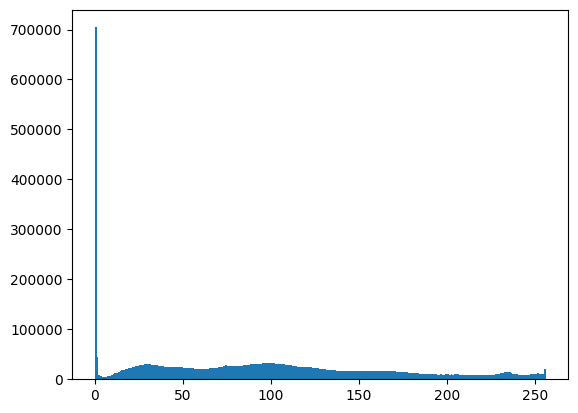

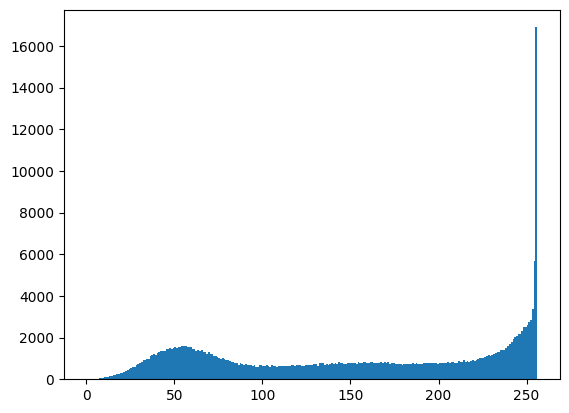

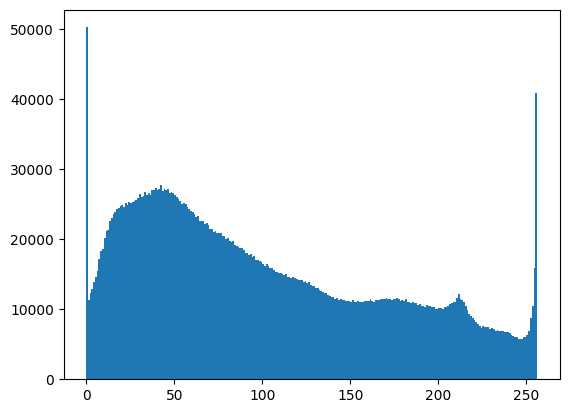

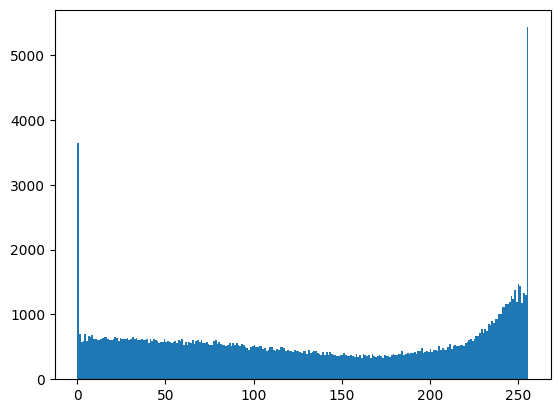

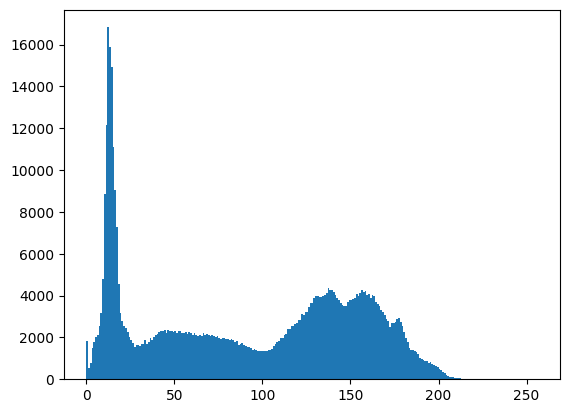

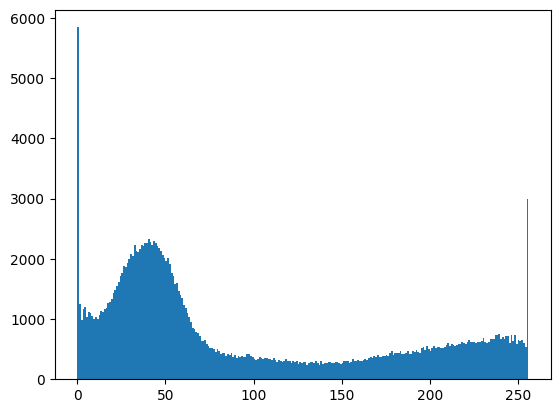

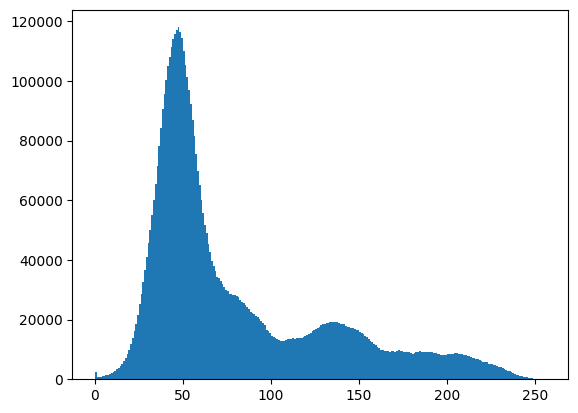

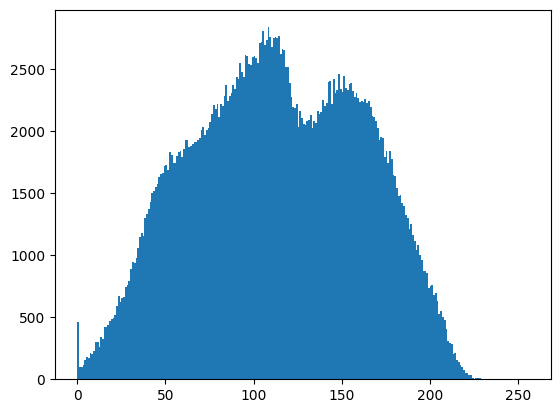

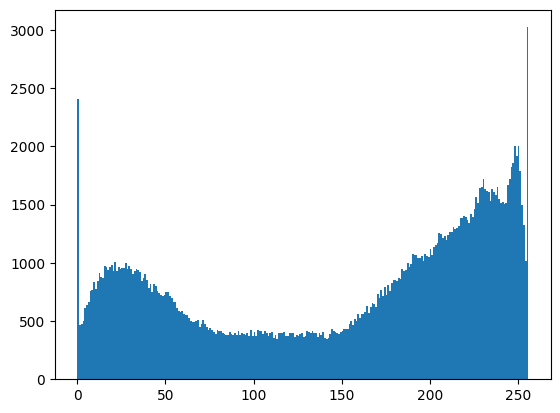

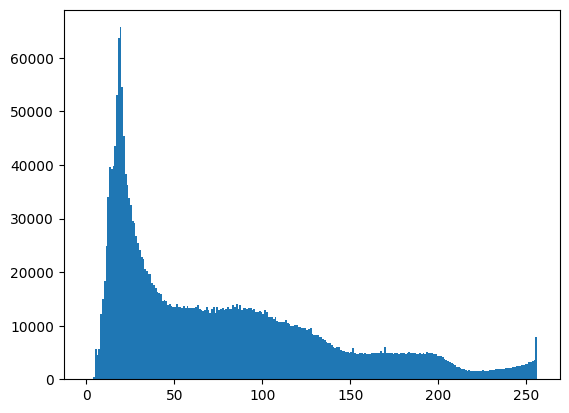

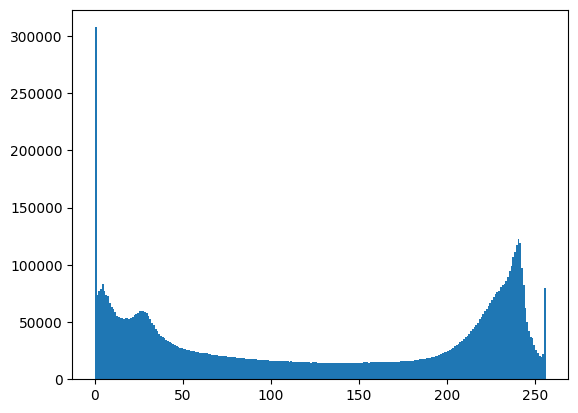

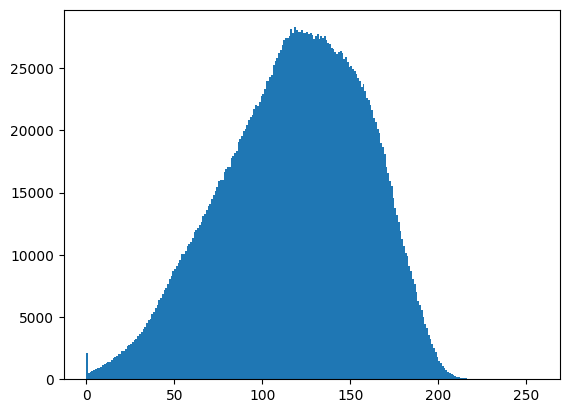

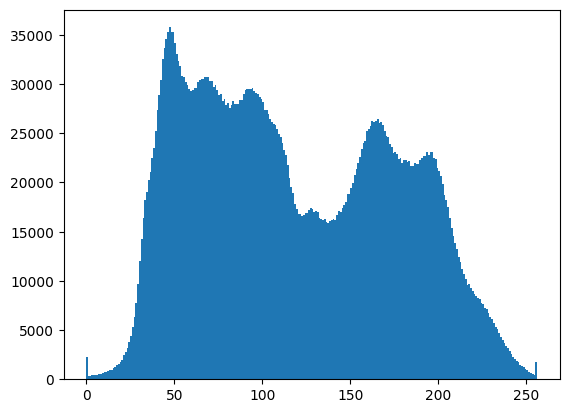

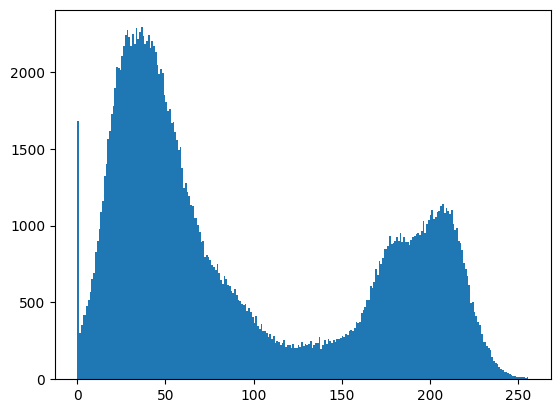

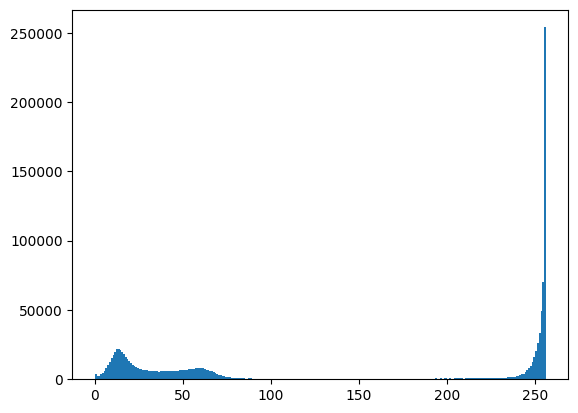

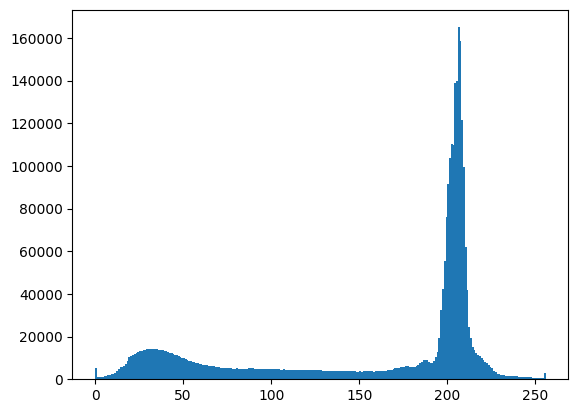

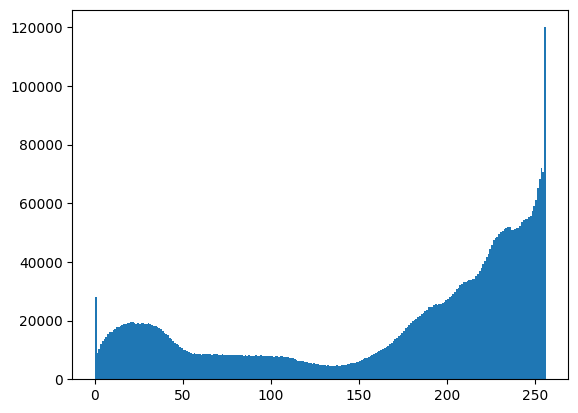

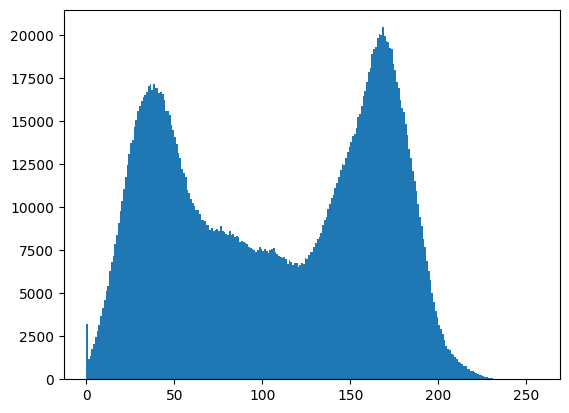

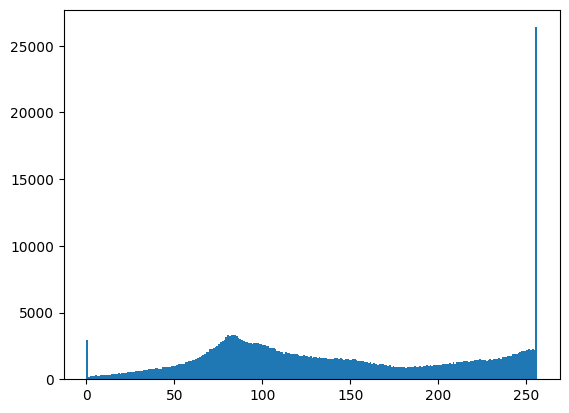

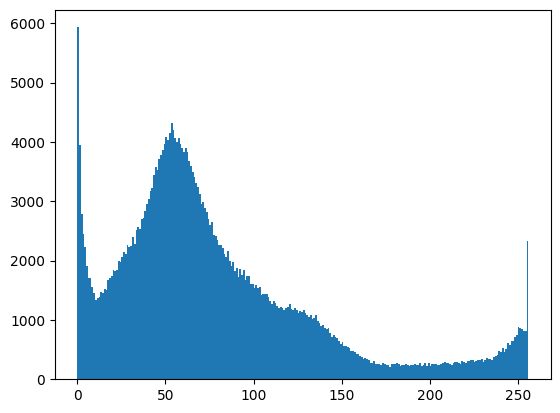

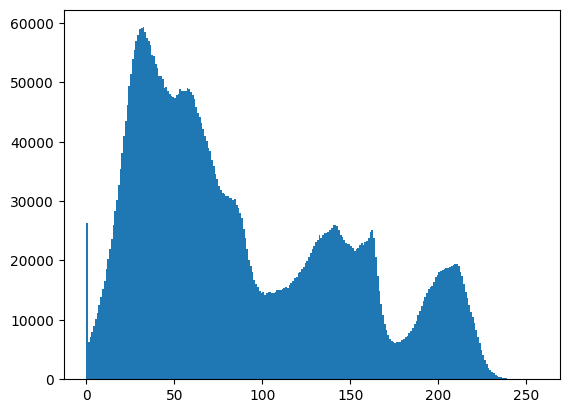

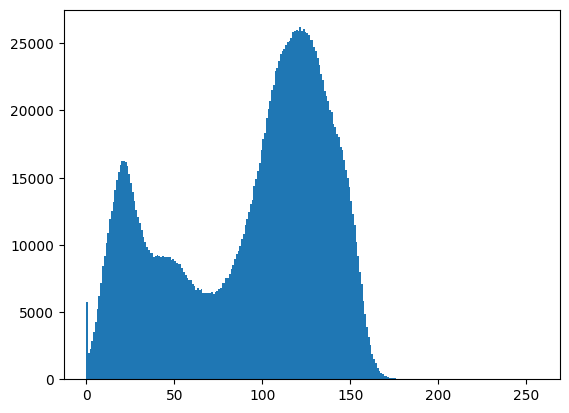

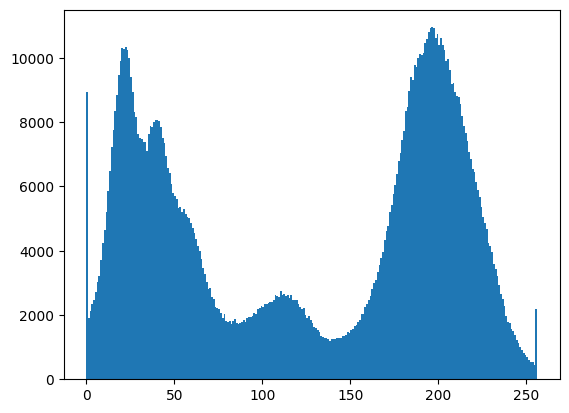

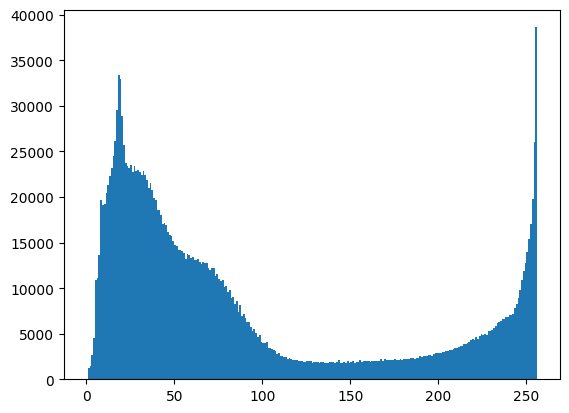

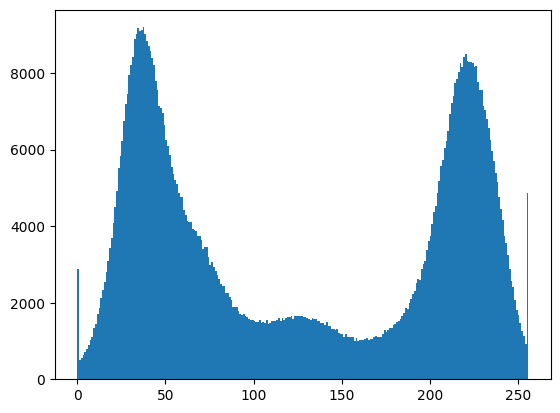

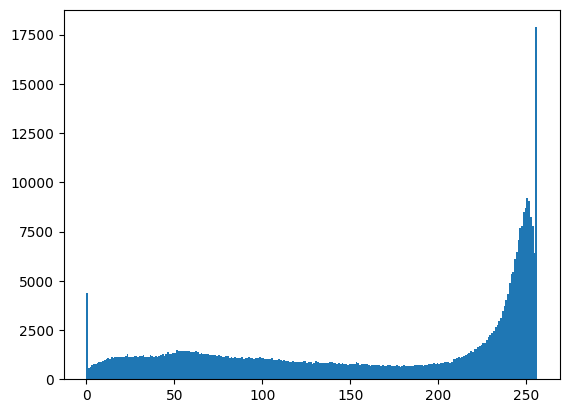

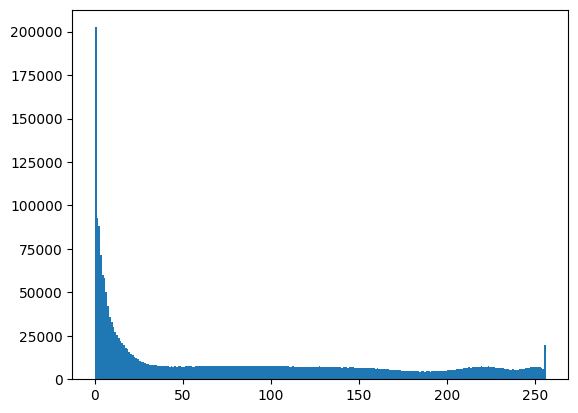

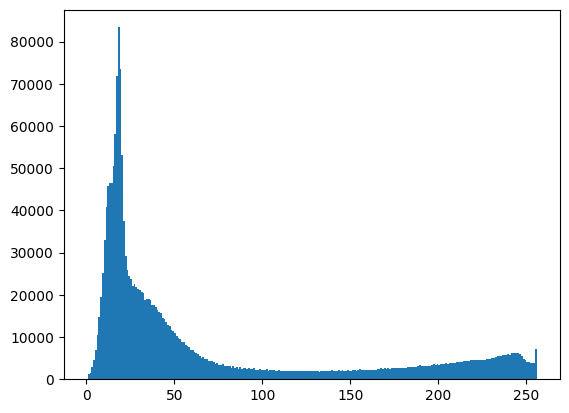

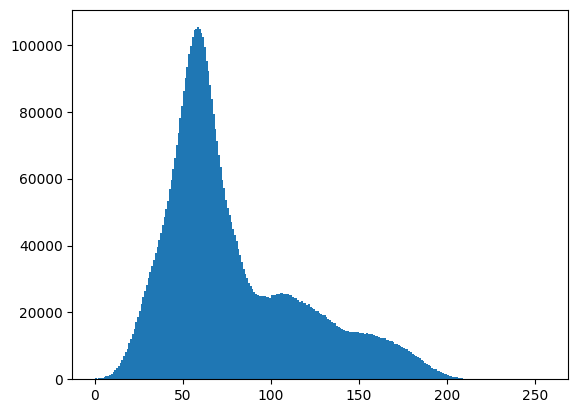

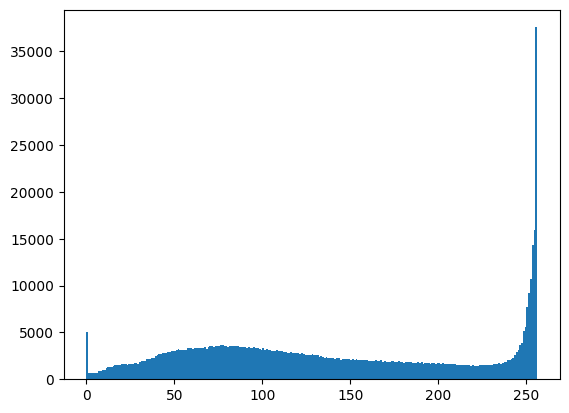

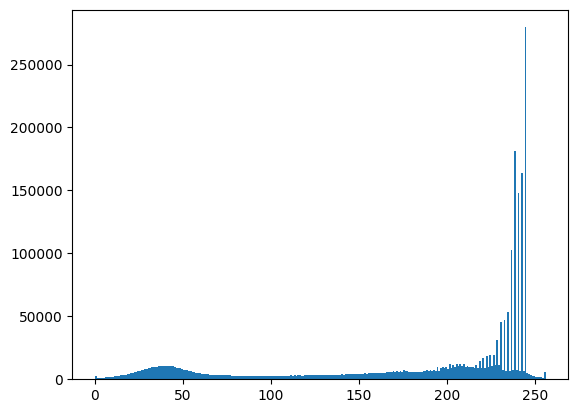

Error reading image: 47.jpg


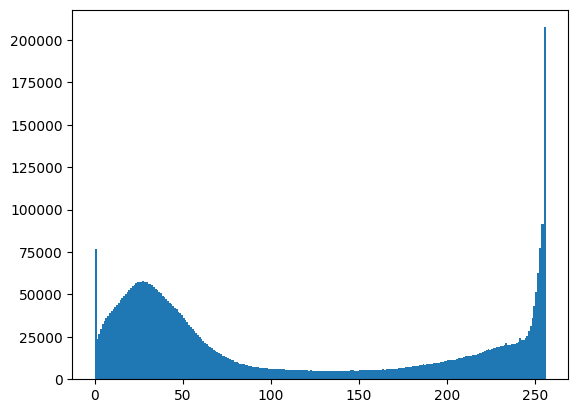

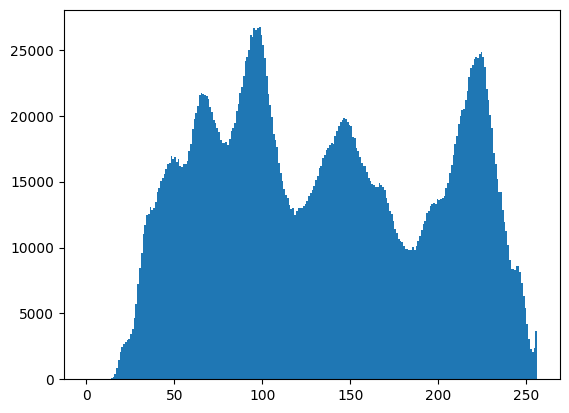

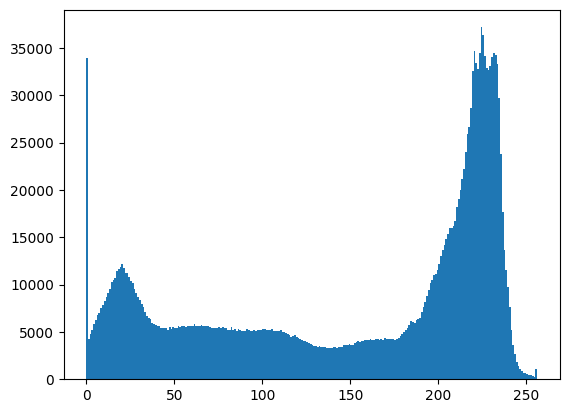

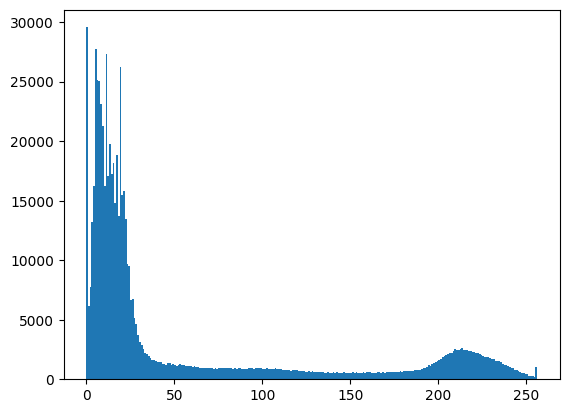

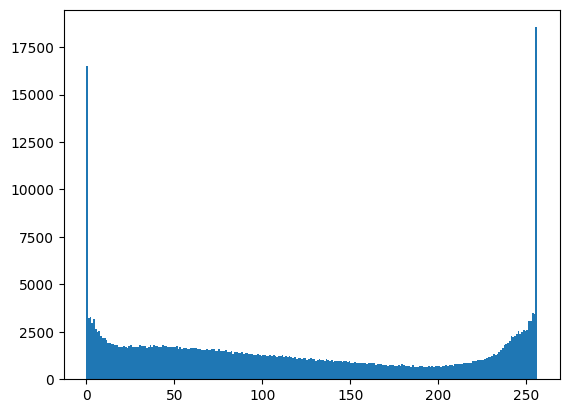

In [ ]:
# Cek error reading pada image

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the directory containing the images
path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-parang"

# Loop through all the images in the directory
for filename in os.listdir(path):
    img_path = os.path.join(path, filename)
    try:
        # Load the image
        img = cv2.imread(img_path)

        # Calculate the histogram
        hist = cv2.calcHist([img],[0],None,[256],[0,256])

        # Plot the histogram
        plt.hist(img.ravel(),256,[0,256])
        plt.show()

    except:
        print(f"Error reading image: {filename}")


diketahui bahwa image 47 terdapat error reading, sehingga aku replace (hapus dan upload kembali di drive) image 47.jpg dengan size yang mirip. Lalu ku coba ulangi kembali dari awal.

In [ ]:
# Histogram
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-parang"

for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    color = ('b','g','r')
    for i,col in enumerate(color):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist,color = col)
    plt.title(filename)
    plt.show()


In [ ]:
# augmentasi
# inisialisasi ImageDataGenerator dengan konfigurasi augmentasi yang diinginkan
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# load gambar dari folder
folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-parang"
img_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]

# load gambar dan lakukan augmentasi
for img_path in img_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ubah dari format BGR menjadi RGB
    img = img.reshape((1,) + img.shape)  # tambahkan dimensi batch
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir='/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/augmented/batik-parang', save_prefix='augmented_', save_format='jpg'):
        i += 1
        if i > 5:  # lakukan augmentasi sebanyak 5 kali
            break


In [ ]:
# RESIZE 64x64

import os
from PIL import Image

# path to the original images
original_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/augmented/batik-parang"

# path to the resized images
resized_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/resize/batik-parang"

# create the resized folder if it doesn't exist
if not os.path.exists(resized_path):
    os.makedirs(resized_path)

# loop through each image in the original folder and resize it
for image_name in os.listdir(original_path):
    img_path = os.path.join(original_path, image_name)
    with Image.open(img_path) as img:
        img = img.convert('RGB')
        img = img.resize((64, 64))
        new_path = os.path.join(resized_path, image_name.split('.')[0] + '.jpeg')
        img.save(new_path, 'JPEG')

- batik megamendung

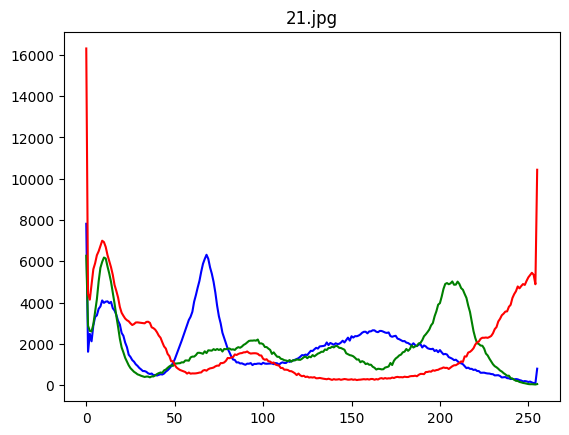

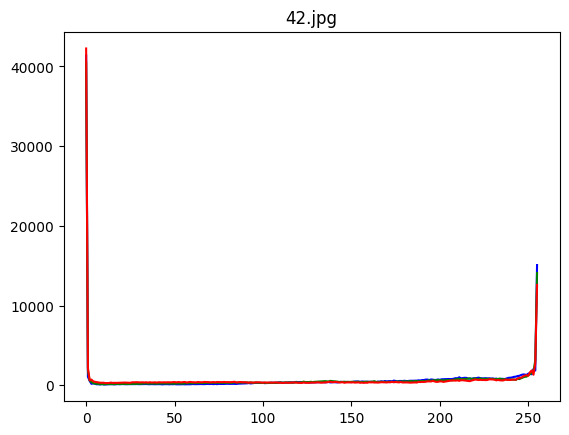

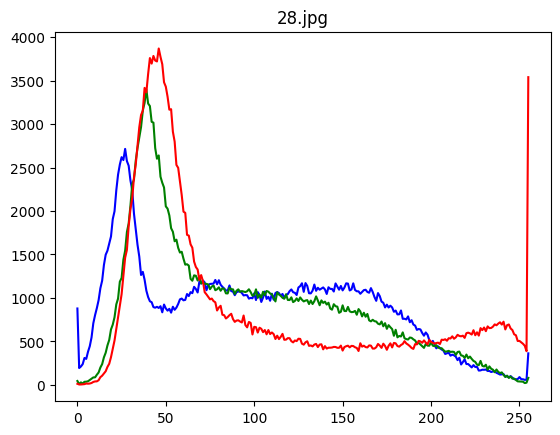

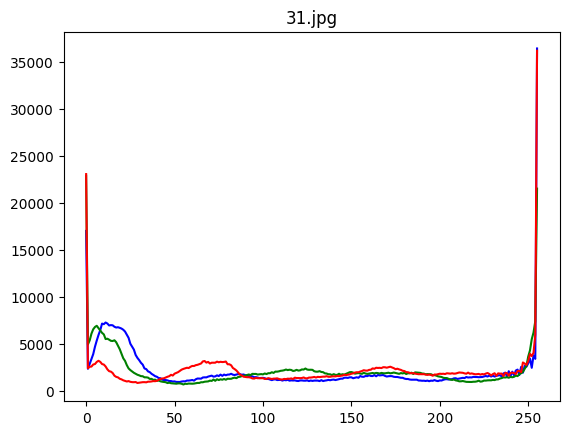

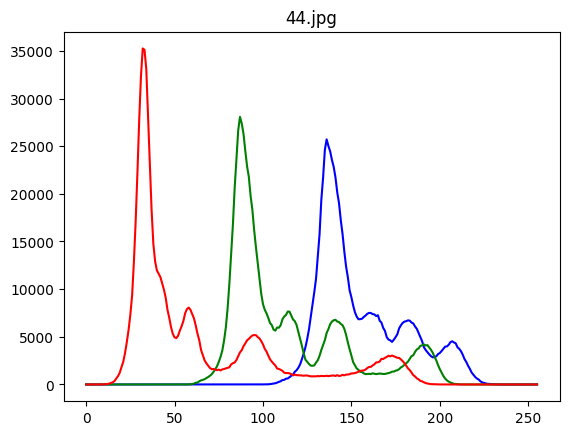

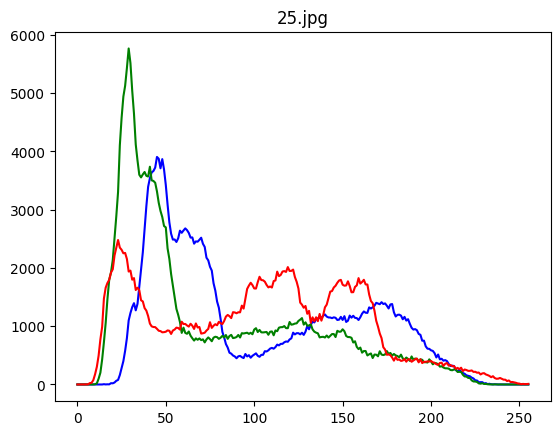

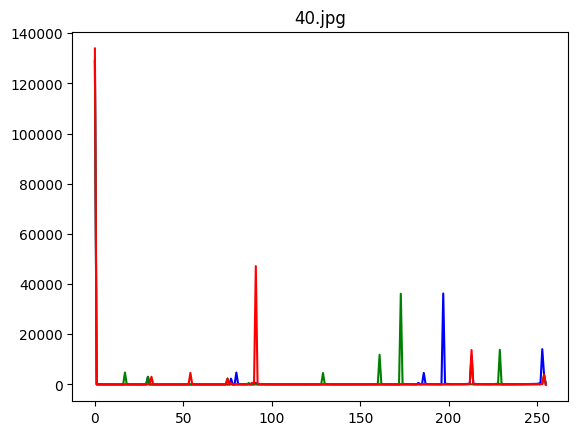

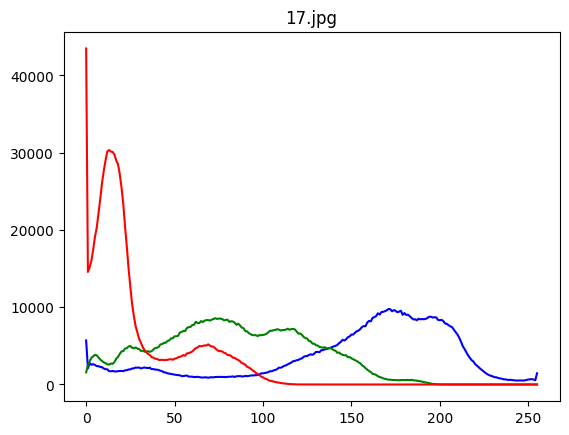

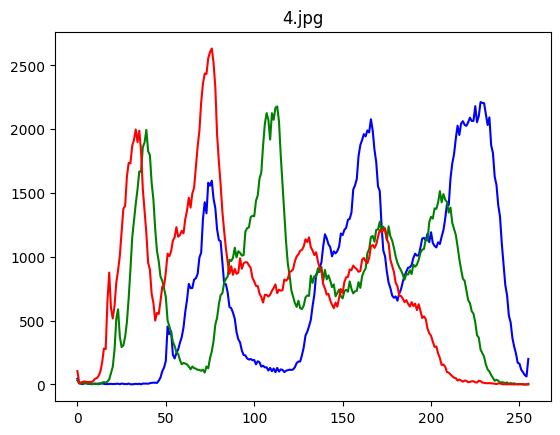

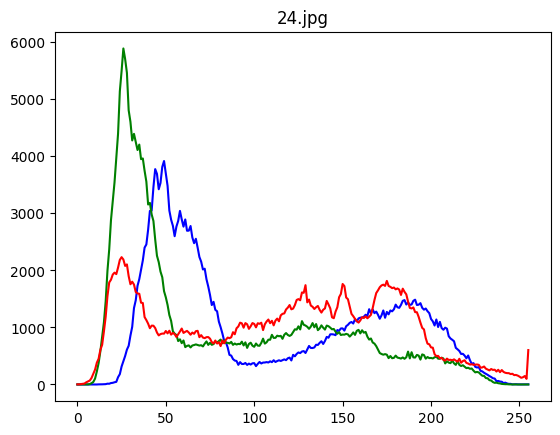

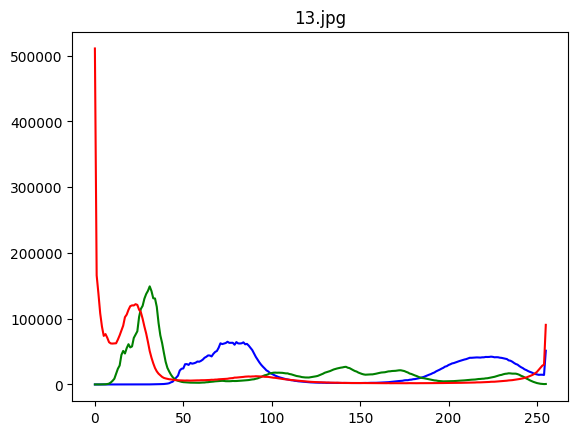

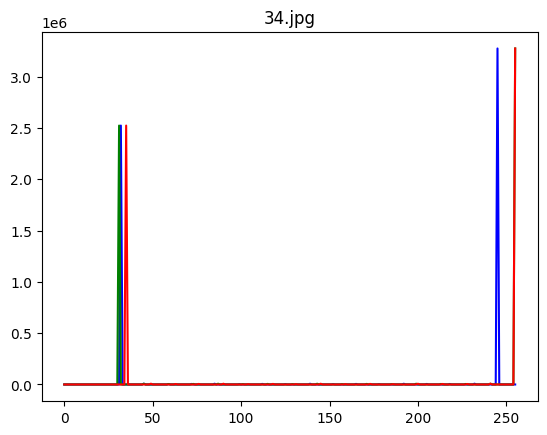

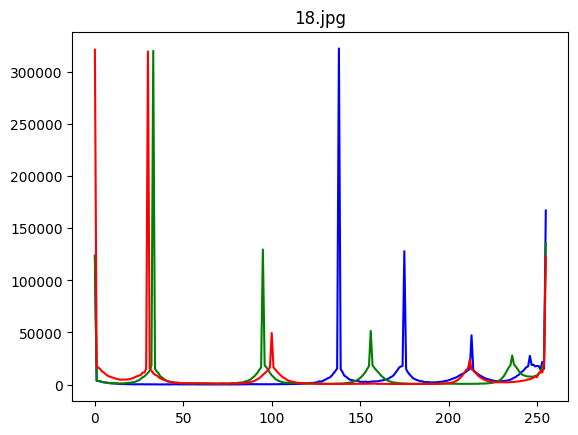

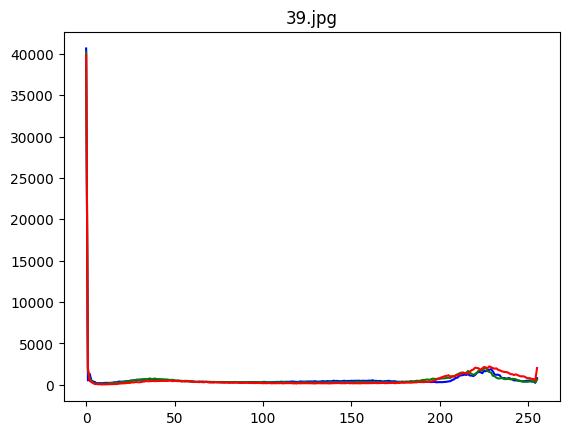

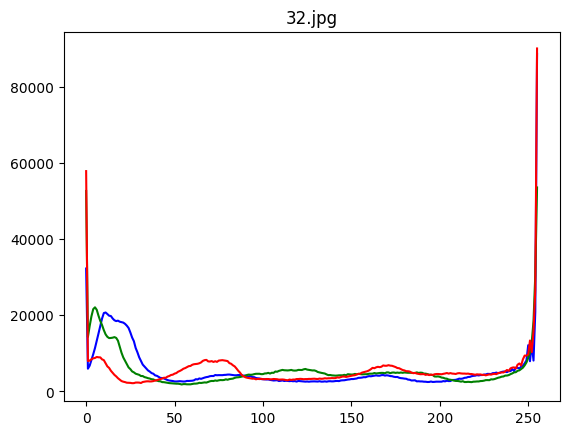

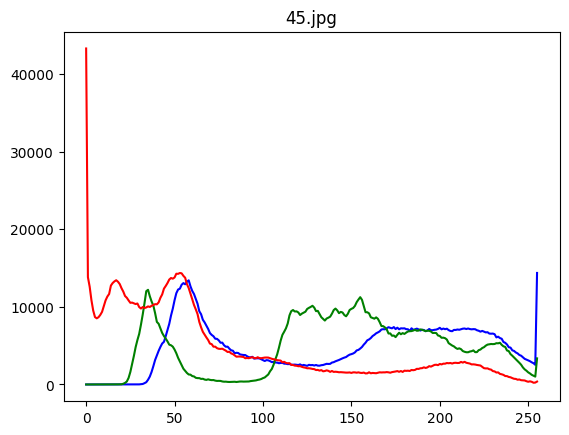

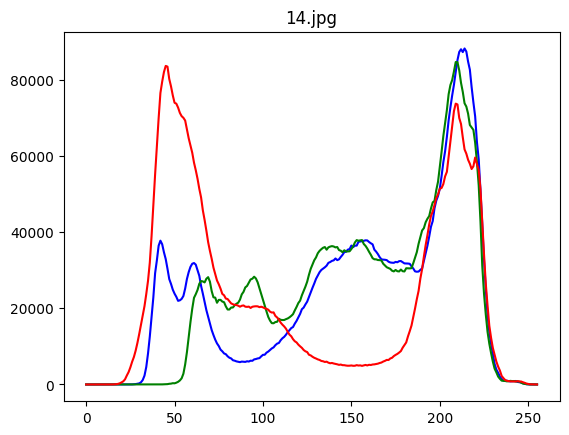

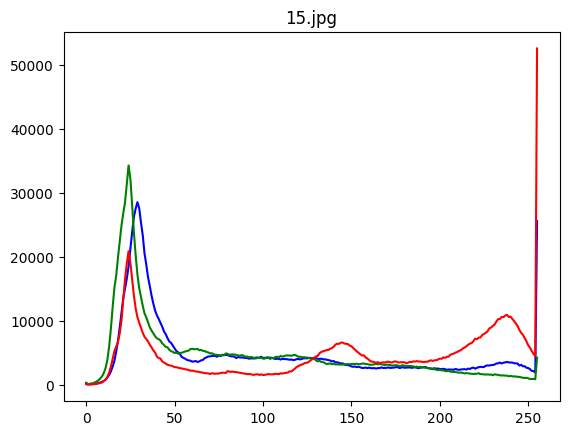

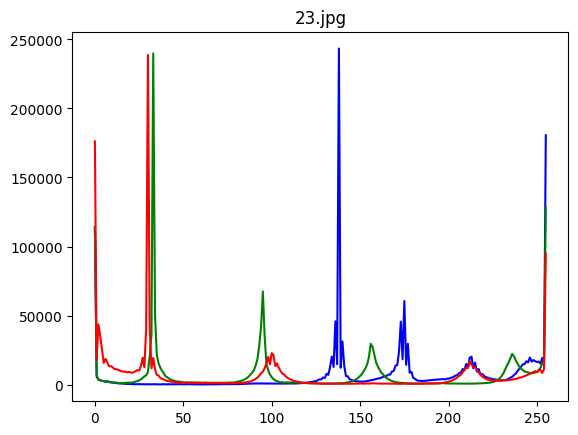

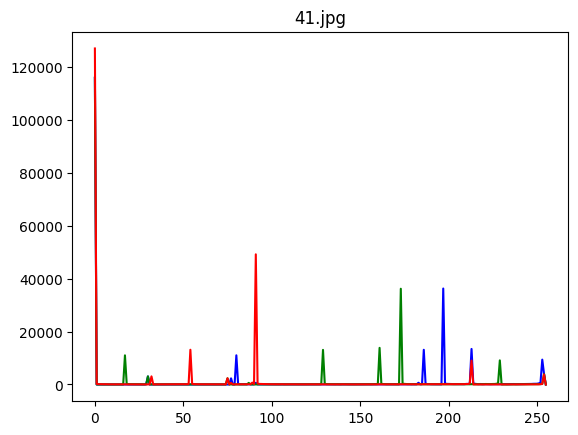

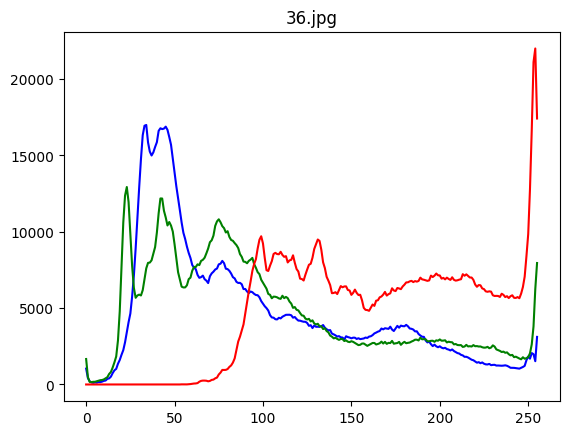

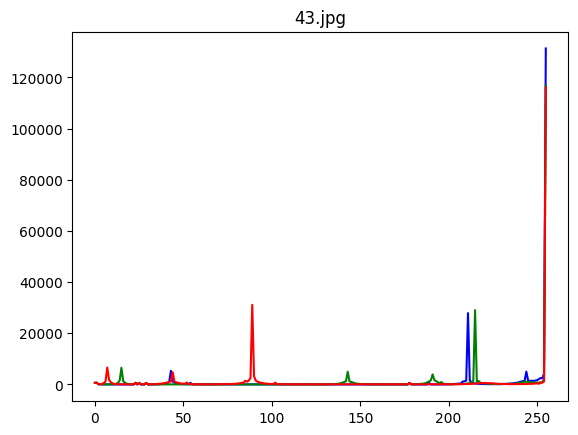

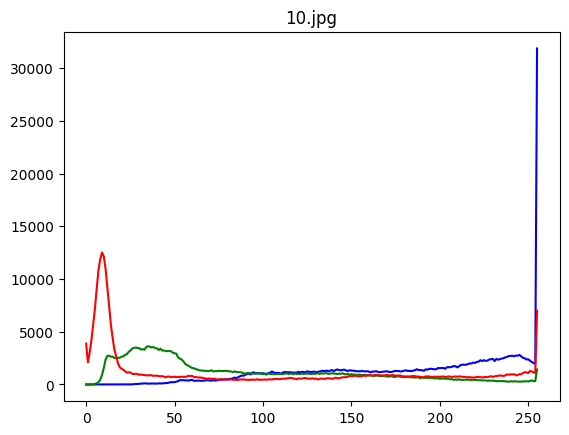

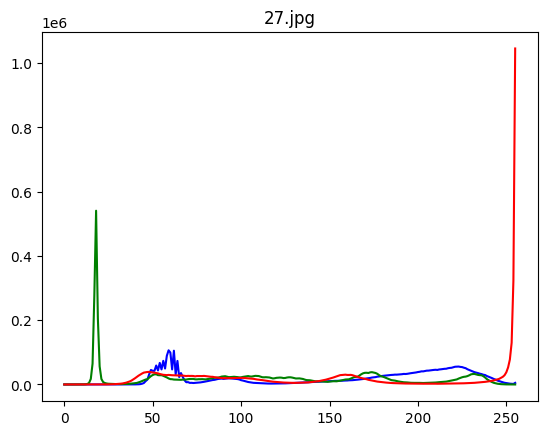

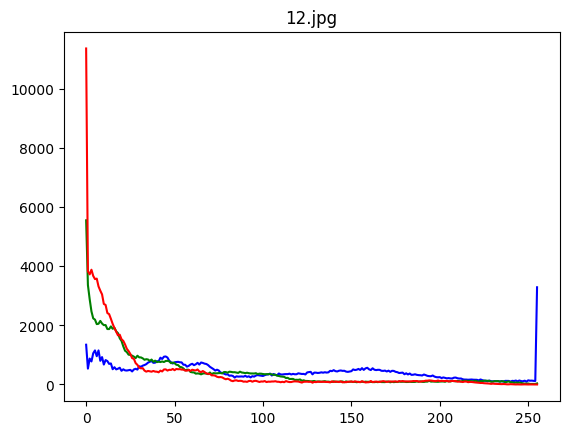

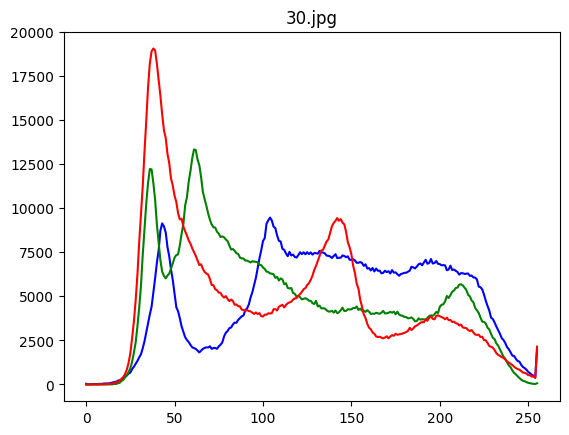

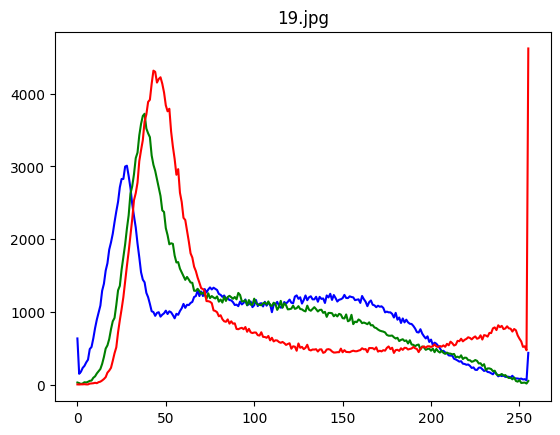

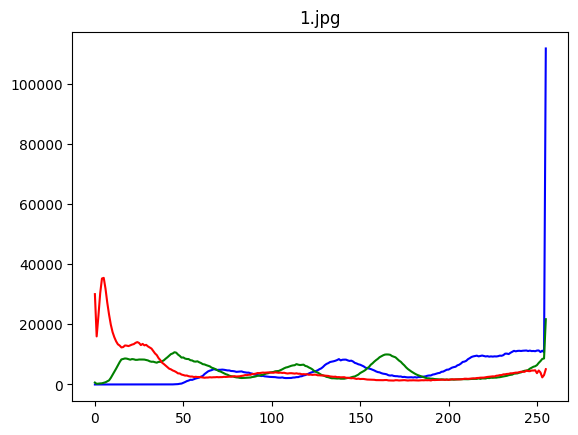

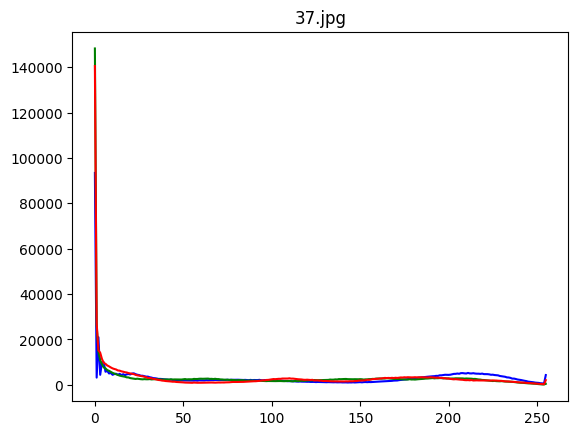

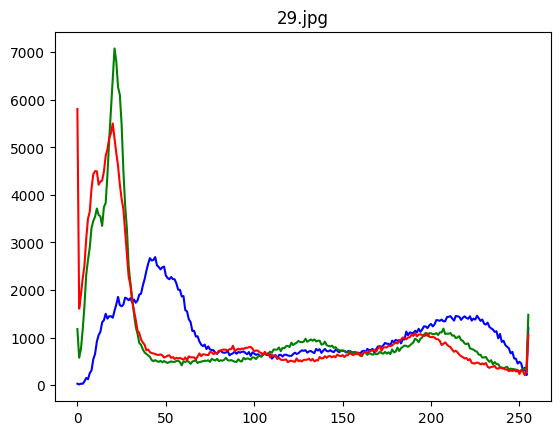

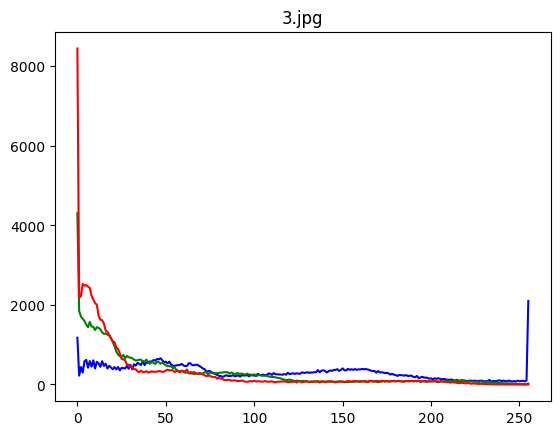

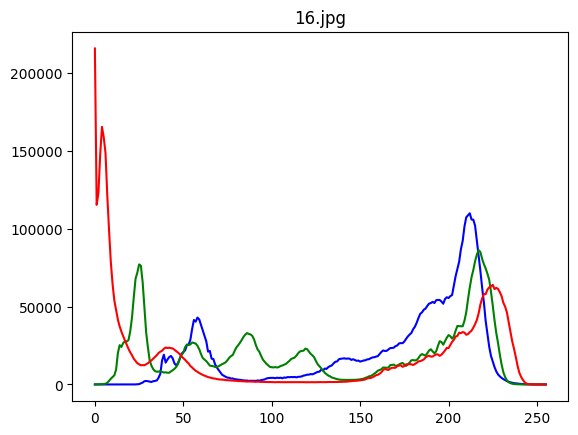

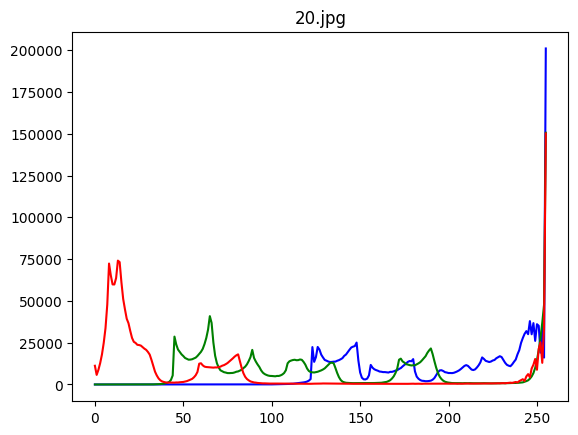

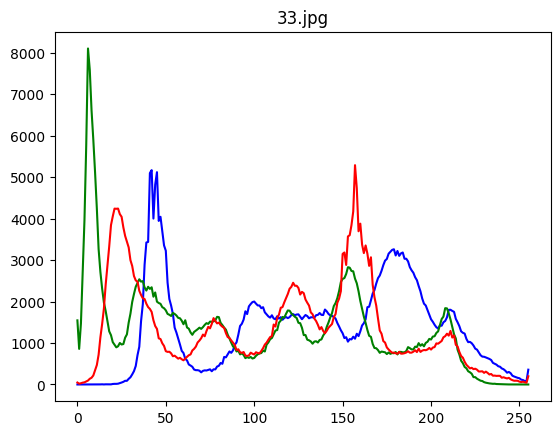

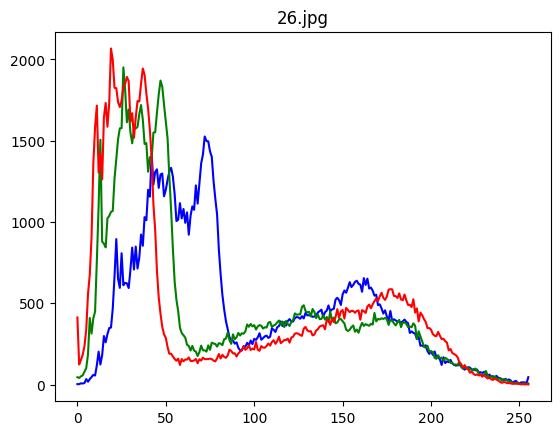

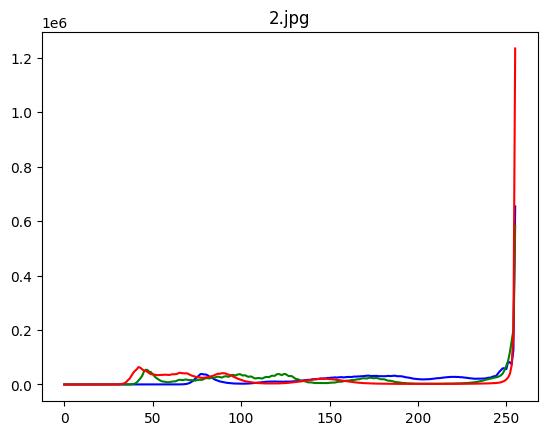

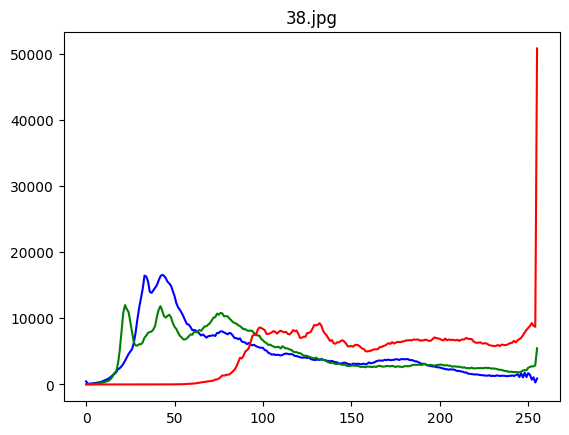

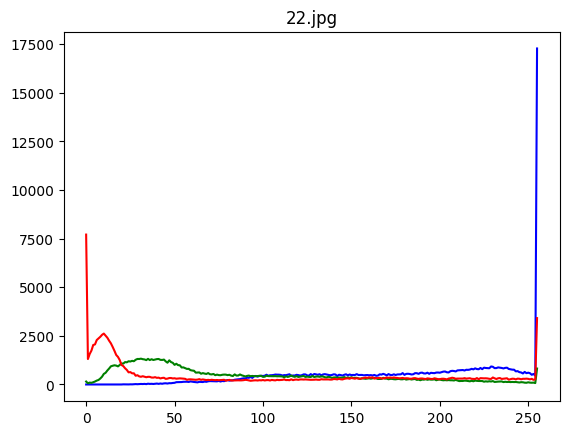

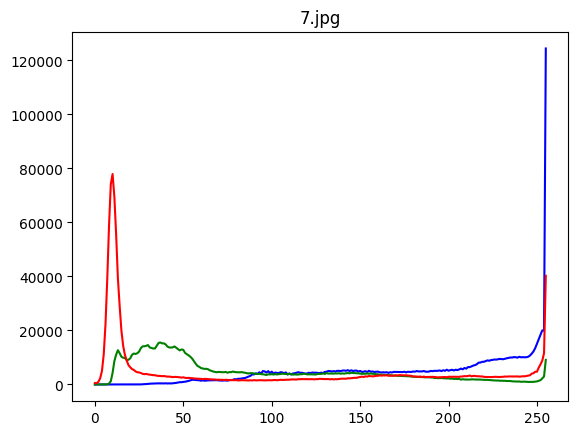

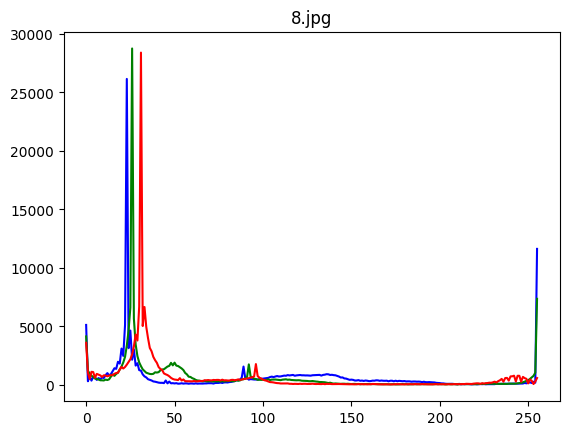

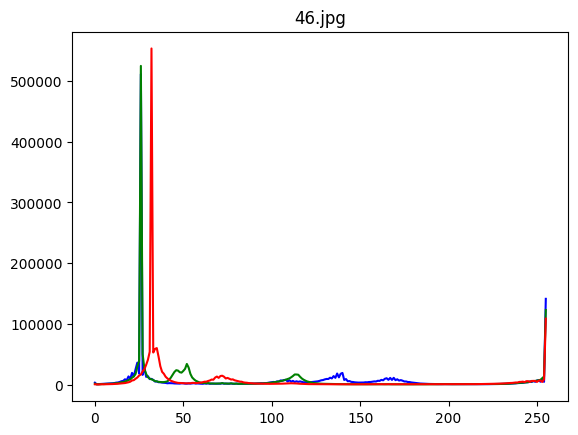

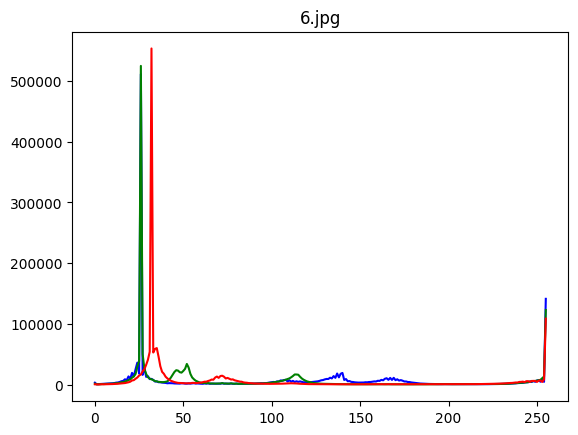

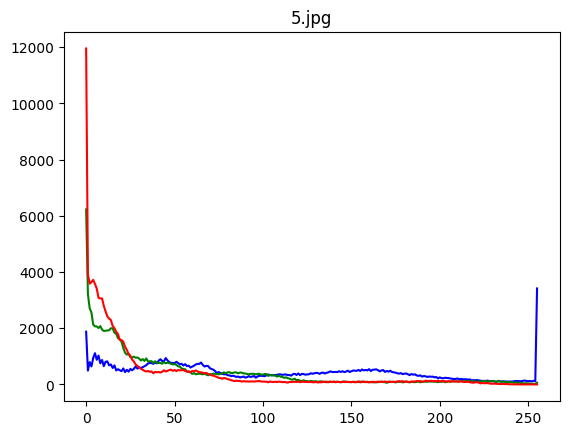

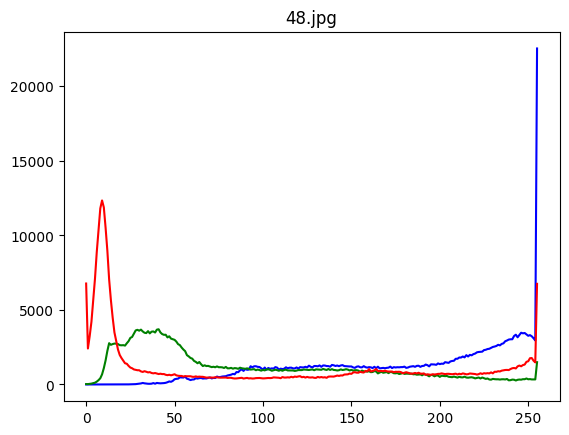

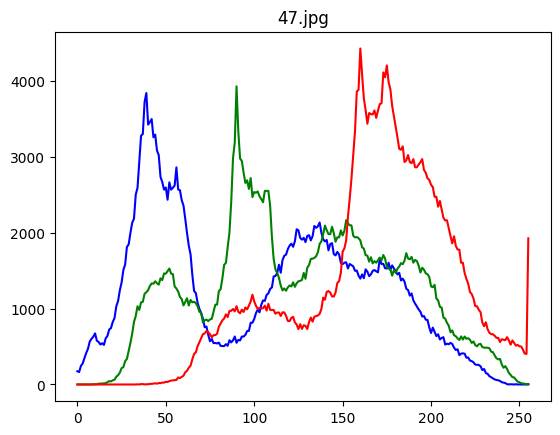

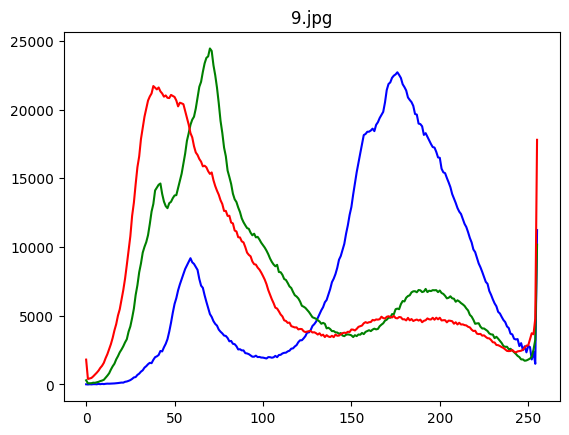

In [ ]:
# Histogram
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-megamendung"

for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    color = ('b','g','r')
    for i,col in enumerate(color):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist,color = col)
    plt.title(filename)
    plt.show()


In [ ]:
# augmentasi
# inisialisasi ImageDataGenerator dengan konfigurasi augmentasi yang diinginkan
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# load gambar dari folder
folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-megamendung"
img_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]

# load gambar dan lakukan augmentasi
for img_path in img_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ubah dari format BGR menjadi RGB
    img = img.reshape((1,) + img.shape)  # tambahkan dimensi batch
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir='/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/augmented/batik-megamendung', save_prefix='augmented_', save_format='jpg'):
        i += 1
        if i > 5:  # lakukan augmentasi sebanyak 5 kali
            break


In [ ]:
# RESIZE 64x64

import os
from PIL import Image

# path to the original images
original_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/augmented/batik-megamendung"

# path to the resized images
resized_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/resize/batik-megamendung"

# create the resized folder if it doesn't exist
if not os.path.exists(resized_path):
    os.makedirs(resized_path)

# loop through each image in the original folder and resize it
for image_name in os.listdir(original_path):
    img_path = os.path.join(original_path, image_name)
    with Image.open(img_path) as img:
        img = img.convert('RGB')
        img = img.resize((64, 64))
        new_path = os.path.join(resized_path, image_name.split('.')[0] + '.jpeg')
        img.save(new_path, 'JPEG')

- batik lasem

In [ ]:
# Histogram
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-lasem"

for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    color = ('b','g','r')
    for i,col in enumerate(color):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist,color = col)
    plt.title(filename)
    plt.show()


In [ ]:
# augmentasi
# inisialisasi ImageDataGenerator dengan konfigurasi augmentasi yang diinginkan
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# load gambar dari folder
folder_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/batik-lasem"
img_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]

# load gambar dan lakukan augmentasi
for img_path in img_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ubah dari format BGR menjadi RGB
    img = img.reshape((1,) + img.shape)  # tambahkan dimensi batch
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir='/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/augmented/batik-lasem', save_prefix='augmented_', save_format='jpg'):
        i += 1
        if i > 5:  # lakukan augmentasi sebanyak 5 kali
            break


In [ ]:
# RESIZE 64x64

import os
from PIL import Image

# path to the original images
original_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/augmented/batik-lasem"

# path to the resized images
resized_path = "/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/resize/batik-lasem"

# create the resized folder if it doesn't exist
if not os.path.exists(resized_path):
    os.makedirs(resized_path)

# loop through each image in the original folder and resize it
for image_name in os.listdir(original_path):
    img_path = os.path.join(original_path, image_name)
    with Image.open(img_path) as img:
        img = img.convert('RGB')
        img = img.resize((64, 64))
        new_path = os.path.join(resized_path, image_name.split('.')[0] + '.jpeg')
        img.save(new_path, 'JPEG')

## Insert Seed
----


In [ ]:
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

##Split The Dataset into Train, Test, and Validation
----


In [ ]:
priangan_path = '/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/resize/priangan_path'
pekalongan_path = '/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/resize/batik-pekalongan'
parang_path ='/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/resize/batik-parang'
megamendung_path ='/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/resize/batik-megamendung'
lasem_path ='/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/resize/batik-lasem'

val_path = '/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/split/validation'
train_path = '/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/split/train'
test_path = '/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/split/test'

In [ ]:
# create train, validation, and test set directory if not exists
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# define the percentage for each set
train_percent = 0.8
val_percent = 0.1
test_percent = 0.1

# loop through each batik type folder and move images into the corresponding set folder
for batik_path in [priangan_path, pekalongan_path, parang_path, megamendung_path, lasem_path]:
    batik_name = os.path.basename(batik_path)
    train_dir = os.path.join(train_path, batik_name)
    val_dir = os.path.join(val_path, batik_name)
    test_dir = os.path.join(test_path, batik_name)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # get the list of images in the current batik type folder
    images = os.listdir(batik_path)

    # shuffle the images randomly
    random.shuffle(images)

    # get the total number of images
    num_images = len(images)

    # calculate the number of images for each set
    num_train = int(num_images * train_percent)
    num_val = int(num_images * val_percent)
    num_test = int(num_images * test_percent)

    # move images into train set
    for image in images[:num_train]:
        src_path = os.path.join(batik_path, image)
        dest_path = os.path.join(train_dir, image)
        shutil.copyfile(src_path, dest_path)

    # move images into validation set
    for image in images[num_train:num_train+num_val]:
        src_path = os.path.join(batik_path, image)
        dest_path = os.path.join(val_dir, image)
        shutil.copyfile(src_path, dest_path)

    # move images into test set
    for image in images[num_train+num_val:]:
        src_path = os.path.join(batik_path, image)
        dest_path = os.path.join(test_dir, image)
        shutil.copyfile(src_path, dest_path)

## Arsitektur base
----
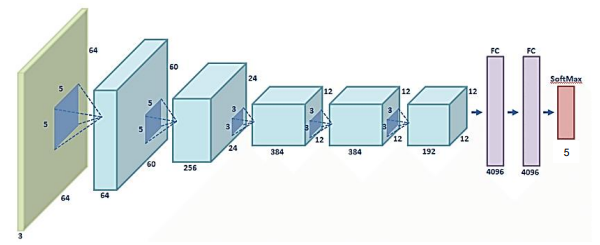

Di atas merupakan arsitektur yang digunakan dalam Alexnet yang mana activation function tiap hidden layer-nya menggunakan ReLU. Di soal, gambar tidak terdapat pooling, namun setelah saya research mengenai AlexNet architechture https://www.researchgate.net/publication/320052364_Classification_of_Architectural_Heritage_Images_Using_Deep_Learning_Techniques bahwa CNN model AlexNet consist of five convolutional layers of which the first, second, and fifth are followed by pooling layers. Sehingga, saya menambahkan pooling pada convolutional ke- 1,2, dan 5. Gambar dibawah ini merupakan bagian yang terdapat pada sumber pada link tersebut.

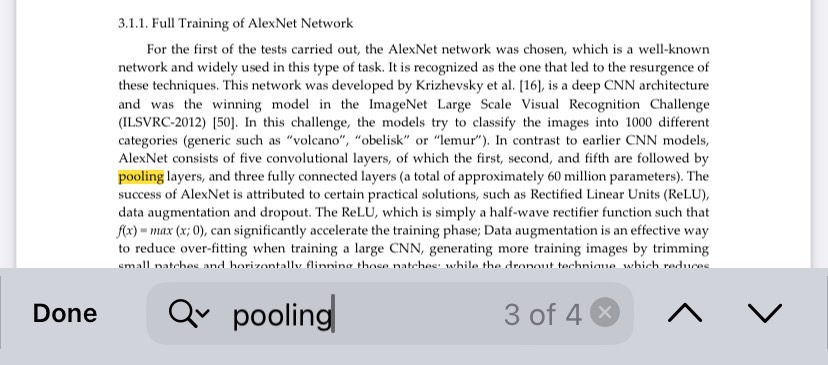

In [ ]:
val_path = '/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/split/validation'
train_path = '/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/split/train'
test_path = '/content/drive/My Drive/DeepLearning/DatasetUTS/Dataset2C/split/test'

In [ ]:
batch_size = 32
epochs = 10
learning_rate = 0.0001 # default-nya optimizer Adam

train_images = []
train_labels = []
val_images = []
val_labels = []
test_images = []
test_labels = []

for folder in [train_path, val_path, test_path]:
    for category in ['batik-priangan', 'batik-pekalongan', 'batik-parang', 'batik-megamendung', 'batik-lasem']:
        folder_path = os.path.join(folder, category)
        for file_name in os.listdir(folder_path):
            img = load_img(os.path.join(folder_path, file_name))
            img_array = img_to_array(img)
            if folder == train_path:
                train_images.append(img_array)
                train_labels.append(category)
            elif folder == val_path:
                val_images.append(img_array)
                val_labels.append(category)
            elif folder == test_path:
                test_images.append(img_array)
                test_labels.append(category)

le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
val_labels = le.transform(val_labels)
test_labels = le.transform(test_labels)

train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)


In [ ]:
# Membuat model sequential
BaseModel = keras.Sequential()

# Menambahkan layer Convolutional dengan 64 filter, kernel size 5x5, valid padding, activation relu, dan input shape 64x64x3
BaseModel.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding='valid', activation="relu",input_shape=(64, 64, 3)))

# Menambahkan layer MaxPooling dengan pool size 14x14 dan strides 2x2
BaseModel.add(layers.MaxPool2D(pool_size=(14, 14), strides= (2, 2)))

# Menambahkan layer Convolutional dengan 256 filter, kernel size 5x5, padding same, activation relu
BaseModel.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation="relu", padding="same"))

# Menambahkan layer MaxPooling dengan pool size 2x2 dan strides 2x2
BaseModel.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Menambahkan layer Convolutional dengan 384 filter, kernel size 3x3, padding same, activation relu
BaseModel.add(layers.Conv2D(filters=384, kernel_size=(3, 3), activation="relu", padding="same"))

# Menambahkan layer Convolutional dengan 384 filter, kernel size 3x3, padding same, activation relu
BaseModel.add(layers.Conv2D(filters=384, kernel_size=(3, 3), activation="relu", padding="same"))

# Menambahkan layer Convolutional dengan 192 filter, kernel size 3x3, padding same, activation relu
BaseModel.add(layers.Conv2D(filters=192, kernel_size=(3, 3), activation="relu", padding="same"))

# Menambahkan layer MaxPooling dengan pool size 3x3 dan strides 2x2
BaseModel.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

# Meratakan output menjadi satu dimensi
BaseModel.add(layers.Flatten())

# Menambahkan layer Dense dengan 4096 unit dan activation relu
BaseModel.add(layers.Dense(4096, activation="relu"))

# Menambahkan layer Dense dengan 4096 unit dan activation relu
BaseModel.add(layers.Dense(4096, activation="relu"))

# Menambahkan layer Dense dengan 5 unit dan activation softmax
BaseModel.add(layers.Dense(5, activation="softmax"))

# Meng-compile model dengan loss function sparse_categorical_crossentropy, optimizer Adam, dan metrics sparse_categorical_accuracy
BaseModel.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

# Menampilkan summary dari model
BaseModel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       409856    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

In [ ]:
BaseModel.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), verbose = 2)

Epoch 1/10
37/37 - 175s - loss: 66.4848 - sparse_categorical_accuracy: 0.2252 - val_loss: 1.6078 - val_sparse_categorical_accuracy: 0.2028 - 175s/epoch - 5s/step
Epoch 2/10
37/37 - 176s - loss: 1.6085 - sparse_categorical_accuracy: 0.1941 - val_loss: 1.6097 - val_sparse_categorical_accuracy: 0.2028 - 176s/epoch - 5s/step
Epoch 3/10
37/37 - 174s - loss: 1.6104 - sparse_categorical_accuracy: 0.2053 - val_loss: 1.6092 - val_sparse_categorical_accuracy: 0.2028 - 174s/epoch - 5s/step
Epoch 4/10
37/37 - 184s - loss: 1.6094 - sparse_categorical_accuracy: 0.1821 - val_loss: 1.6090 - val_sparse_categorical_accuracy: 0.2028 - 184s/epoch - 5s/step
Epoch 5/10
37/37 - 204s - loss: 1.6097 - sparse_categorical_accuracy: 0.2019 - val_loss: 1.6091 - val_sparse_categorical_accuracy: 0.2028 - 204s/epoch - 6s/step
Epoch 6/10
37/37 - 178s - loss: 1.6093 - sparse_categorical_accuracy: 0.2053 - val_loss: 1.6092 - val_sparse_categorical_accuracy: 0.2028 - 178s/epoch - 5s/step
Epoch 7/10
37/37 - 176s - loss: 1

In [ ]:
loss, accuracy = BaseModel.evaluate(val_images, val_labels)
print(f'Accuracy basemodel to data validation: {accuracy}')

5/5 [==============================] - 4s 714ms/step - loss: 1.6091 - sparse_categorical_accuracy: 0.2028
Accuracy basemodel to data validation: 0.20279720425605774


## Modifikasi Arsitektur
----

1) Menambahkan batch normalization, regulation, dan drop out

In [ ]:
ModelA = keras.Sequential() # membuat model sequential dengan nama ModelA

ModelA.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding='valid', activation="relu",input_shape=(64, 64, 3))) # menambahkan layer Conv2D dengan 64 filter, kernel_size 5x5, valid padding, activation ReLU, dan input shape 64x64x3

ModelA.add(layers.BatchNormalization()) # menambahkan layer BatchNormalization

ModelA.add(layers.MaxPool2D(pool_size=(14, 14), strides= (2, 2))) # menambahkan layer MaxPool2D dengan pool size 14x14 dan stride 2x2

ModelA.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation="relu", padding="same")) # menambahkan layer Conv2D dengan 256 filter, kernel_size 5x5, padding same, dan activation ReLU

ModelA.add(layers.BatchNormalization()) # menambahkan layer BatchNormalization

ModelA.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))) # menambahkan layer MaxPool2D dengan pool size 2x2 dan stride 2x2

ModelA.add(layers.Conv2D(filters=384, kernel_size=(3, 3), activation="relu", padding="same")) # menambahkan layer Conv2D dengan 384 filter, kernel_size 3x3, padding same, dan activation ReLU

ModelA.add(layers.BatchNormalization()) # menambahkan layer BatchNormalization

ModelA.add(layers.Conv2D(filters=384, kernel_size=(3, 3), activation="relu", padding="same")) # menambahkan layer Conv2D dengan 384 filter, kernel_size 3x3, padding same, dan activation ReLU

ModelA.add(layers.BatchNormalization()) # menambahkan layer BatchNormalization

ModelA.add(layers.Conv2D(filters=192, kernel_size=(3, 3), activation="relu", padding="same")) # menambahkan layer Conv2D dengan 192 filter, kernel_size 3x3, padding same, dan activation ReLU

ModelA.add(layers.BatchNormalization()) # menambahkan layer BatchNormalization

ModelA.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2))) # menambahkan layer MaxPool2D dengan pool size 3x3 dan stride 2x2

ModelA.add(layers.Flatten()) # menambahkan layer Flatten untuk mengubah output menjadi vektor 1 dimensi

ModelA.add(layers.Dropout(0.5)) # menambahkan layer Dropout dengan nilai dropout 0.5

ModelA.add(layers.Dense(4096, activation="relu")) # menambahkan layer Dense dengan 4096 neuron dan activation ReLU

ModelA.add(layers.Dense(4096, activation="relu")) # menambahkan layer Dense dengan 4096 neuron dan activation ReLU

ModelA.add(layers.Dense(5, activation="softmax")) # menambahkan layer Dense dengan 5 neuron dan activation softmax

ModelA.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"]) # melakukan kompilasi model dengan loss function sparse_categorical_crossentropy, optimizer Adam, dan metrik sparse_categorical_accuracy

ModelA.summary() # menampilkan ringkasan dari model yang telah dibuat


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 256)       409856    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 256)      1024      
 hNormalization)                                                 
                                                      

In [ ]:
ModelA.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), verbose = 2)

Epoch 1/10
37/37 - 180s - loss: 7.7321 - sparse_categorical_accuracy: 0.3106 - val_loss: 40.4450 - val_sparse_categorical_accuracy: 0.1888 - 180s/epoch - 5s/step
Epoch 2/10
37/37 - 175s - loss: 1.4047 - sparse_categorical_accuracy: 0.4185 - val_loss: 2.7648 - val_sparse_categorical_accuracy: 0.2308 - 175s/epoch - 5s/step
Epoch 3/10
37/37 - 179s - loss: 1.2733 - sparse_categorical_accuracy: 0.4694 - val_loss: 2.9225 - val_sparse_categorical_accuracy: 0.3217 - 179s/epoch - 5s/step
Epoch 4/10
37/37 - 178s - loss: 1.2021 - sparse_categorical_accuracy: 0.5073 - val_loss: 2.8409 - val_sparse_categorical_accuracy: 0.3846 - 178s/epoch - 5s/step
Epoch 5/10
37/37 - 178s - loss: 1.1779 - sparse_categorical_accuracy: 0.5151 - val_loss: 1.0859 - val_sparse_categorical_accuracy: 0.5245 - 178s/epoch - 5s/step
Epoch 6/10
37/37 - 178s - loss: 1.1221 - sparse_categorical_accuracy: 0.5470 - val_loss: 1.6940 - val_sparse_categorical_accuracy: 0.3986 - 178s/epoch - 5s/step
Epoch 7/10
37/37 - 177s - loss: 1

In [ ]:
loss, accuracy = ModelA.evaluate(val_images, val_labels)
print(f'Accuracy modified model A to data validation: {accuracy}')

5/5 [==============================] - 4s 752ms/step - loss: 1.4009 - sparse_categorical_accuracy: 0.4895
Accuracy modified model A to data validation: 0.4895104765892029


2) Model B menambahkan regularisasi L1 dengan alpha=0.001 pada layer dense

In [ ]:
from keras.regularizers import l1

ModelB = keras.Sequential()
ModelB.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding='valid', activation="relu",input_shape=(64, 64, 3)))

ModelB.add(layers.BatchNormalization())

ModelB.add(layers.MaxPool2D(pool_size=(14, 14), strides= (2, 2)))

ModelB.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation="relu", padding="same"))

ModelB.add(layers.BatchNormalization())

ModelB.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

ModelB.add(layers.Conv2D(filters=384, kernel_size=(3, 3), activation="relu", padding="same"))

ModelB.add(layers.BatchNormalization())

ModelB.add(layers.Conv2D(filters=384, kernel_size=(3, 3), activation="relu", padding="same"))

ModelB.add(layers.BatchNormalization())

ModelB.add(layers.Conv2D(filters=192, kernel_size=(3, 3), activation="relu", padding="same"))

ModelB.add(layers.BatchNormalization())

ModelB.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

ModelB.add(layers.Flatten())
ModelB.add(layers.Dropout(0.5))

ModelB.add(layers.Dense(4096, activation="relu", kernel_regularizer=l1(0.001))) # menambahkan regularisasi L1 dengan alpha=0.001
ModelB.add(layers.Dense(4096, activation="relu", kernel_regularizer=l1(0.001))) # menambahkan regularisasi L1 dengan alpha=0.001
ModelB.add(layers.Dense(5, activation="softmax"))

ModelB.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

ModelB.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 60, 60, 64)        4864      
                                                                 
 batch_normalization_5 (Batc  (None, 60, 60, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 256)       409856    
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 256)      1024      
 hNormalization)                                                 
                                                      

In [ ]:
ModelB.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), verbose = 2)

Epoch 1/10
37/37 - 201s - loss: 342.2512 - sparse_categorical_accuracy: 0.3339 - val_loss: 198.2083 - val_sparse_categorical_accuracy: 0.2028 - 201s/epoch - 5s/step
Epoch 2/10
37/37 - 193s - loss: 109.5506 - sparse_categorical_accuracy: 0.4305 - val_loss: 54.4437 - val_sparse_categorical_accuracy: 0.2867 - 193s/epoch - 5s/step
Epoch 3/10
37/37 - 188s - loss: 32.8501 - sparse_categorical_accuracy: 0.4789 - val_loss: 18.1889 - val_sparse_categorical_accuracy: 0.4266 - 188s/epoch - 5s/step
Epoch 4/10
37/37 - 189s - loss: 12.5881 - sparse_categorical_accuracy: 0.4849 - val_loss: 8.7264 - val_sparse_categorical_accuracy: 0.4196 - 189s/epoch - 5s/step
Epoch 5/10
37/37 - 193s - loss: 7.0199 - sparse_categorical_accuracy: 0.4849 - val_loss: 5.8440 - val_sparse_categorical_accuracy: 0.5175 - 193s/epoch - 5s/step
Epoch 6/10
37/37 - 187s - loss: 5.3066 - sparse_categorical_accuracy: 0.5116 - val_loss: 5.1104 - val_sparse_categorical_accuracy: 0.3986 - 187s/epoch - 5s/step
Epoch 7/10
37/37 - 187s 

In [ ]:
loss, accuracy = ModelB.evaluate(val_images, val_labels)
print(f'Accuracy modified model B to data validation: {accuracy}')

5/5 [==============================] - 4s 810ms/step - loss: 4.7793 - sparse_categorical_accuracy: 0.4476
Accuracy modified model 1 to data validation: 0.4475524425506592


3) Tuning hyperparameter dengan GridSearchCV dengan cross validation = 3 untuk mencari hyperparameter yang terbaik

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import regularizers

param_grid = {'filters': [32, 64, 128],
              'dropout_rate': [0.2, 0.5],
              'learning_rate': [0.001, 0.01]}

def build_model(filters=64, dropout_rate=0.2, learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=filters, kernel_size=(5, 5), padding='valid', activation="relu",input_shape=(64, 64, 3)))
    model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
    model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation="relu", padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), activation="relu", padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), activation="relu", padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(filters=192, kernel_size=(3, 3), activation="relu", padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(4096, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(5, activation="softmax"))

    optimizer = keras.optimizers.Adam(lr=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])

    return model

# create model
ModelB = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=5, verbose=2)

# create GridSearchCV object
grid = GridSearchCV(estimator=ModelB, param_grid=param_grid, cv=3)

# fit GridSearchCV
grid_result = grid.fit(train_images, train_labels)

# print results
print("Best parameters found: ", grid_result.best_params_)
print("Best score found: ", grid_result.best_score_)


<ipython-input-17-fd447a1de472>:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ModelB = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=5, verbose=2)


Epoch 1/5
25/25 - 122s - loss: 12.8083 - accuracy: 0.4689 - 122s/epoch - 5s/step
Epoch 2/5
25/25 - 117s - loss: 10.5889 - accuracy: 0.5492 - 117s/epoch - 5s/step
Epoch 3/5
25/25 - 116s - loss: 9.5752 - accuracy: 0.6477 - 116s/epoch - 5s/step
Epoch 4/5
25/25 - 116s - loss: 8.5899 - accuracy: 0.6567 - 116s/epoch - 5s/step
Epoch 5/5
25/25 - 117s - loss: 7.7202 - accuracy: 0.6995 - 117s/epoch - 5s/step
13/13 - 13s - loss: 12.3478 - accuracy: 0.0233 - 13s/epoch - 1s/step


Epoch 1/5
25/25 - 121s - loss: 12.2264 - accuracy: 0.4541 - 121s/epoch - 5s/step
Epoch 2/5
25/25 - 117s - loss: 10.4344 - accuracy: 0.5446 - 117s/epoch - 5s/step
Epoch 3/5
25/25 - 116s - loss: 9.3410 - accuracy: 0.6016 - 116s/epoch - 5s/step
Epoch 4/5
25/25 - 115s - loss: 8.4052 - accuracy: 0.6455 - 115s/epoch - 5s/step
Epoch 5/5
25/25 - 117s - loss: 7.7188 - accuracy: 0.6041 - 117s/epoch - 5s/step
13/13 - 14s - loss: 16.1216 - accuracy: 0.2098 - 14s/epoch - 1s/step


Epoch 1/5
25/25 - 121s - loss: 13.3950 - accuracy: 0.3829 - 121s/epoch - 5s/step
Epoch 2/5
25/25 - 118s - loss: 10.7630 - accuracy: 0.4696 - 118s/epoch - 5s/step
Epoch 3/5
25/25 - 117s - loss: 9.7009 - accuracy: 0.5550 - 117s/epoch - 5s/step
Epoch 4/5
25/25 - 117s - loss: 9.1377 - accuracy: 0.4916 - 117s/epoch - 5s/step
Epoch 5/5
25/25 - 116s - loss: 8.2086 - accuracy: 0.5550 - 116s/epoch - 5s/step
13/13 - 13s - loss: 6.9541 - accuracy: 0.9301 - 13s/epoch - 1s/step


Epoch 1/5
25/25 - 121s - loss: 12.6161 - accuracy: 0.4534 - 121s/epoch - 5s/step
Epoch 2/5
25/25 - 117s - loss: 10.4808 - accuracy: 0.5570 - 117s/epoch - 5s/step
Epoch 3/5
25/25 - 118s - loss: 9.4177 - accuracy: 0.6425 - 118s/epoch - 5s/step
Epoch 4/5
25/25 - 117s - loss: 8.5496 - accuracy: 0.5959 - 117s/epoch - 5s/step
Epoch 5/5
25/25 - 117s - loss: 7.5624 - accuracy: 0.6995 - 117s/epoch - 5s/step
13/13 - 13s - loss: 14.4336 - accuracy: 0.0052 - 13s/epoch - 990ms/step


Epoch 1/5
25/25 - 120s - loss: 12.1529 - accuracy: 0.4463 - 120s/epoch - 5s/step
Epoch 2/5
25/25 - 117s - loss: 10.4385 - accuracy: 0.4838 - 117s/epoch - 5s/step
Epoch 3/5
25/25 - 117s - loss: 9.4091 - accuracy: 0.5640 - 117s/epoch - 5s/step
Epoch 4/5
25/25 - 116s - loss: 8.4062 - accuracy: 0.5744 - 116s/epoch - 5s/step
Epoch 5/5
25/25 - 115s - loss: 7.7197 - accuracy: 0.5873 - 115s/epoch - 5s/step
13/13 - 13s - loss: 14.9932 - accuracy: 0.1321 - 13s/epoch - 1s/step


Epoch 1/5
25/25 - 120s - loss: 13.5455 - accuracy: 0.3441 - 120s/epoch - 5s/step
Epoch 2/5
25/25 - 117s - loss: 10.9859 - accuracy: 0.4230 - 117s/epoch - 5s/step
Epoch 3/5
25/25 - 116s - loss: 9.8043 - accuracy: 0.4981 - 116s/epoch - 5s/step
Epoch 4/5
25/25 - 116s - loss: 9.0285 - accuracy: 0.5071 - 116s/epoch - 5s/step
Epoch 5/5
25/25 - 115s - loss: 8.3295 - accuracy: 0.5459 - 115s/epoch - 5s/step
13/13 - 12s - loss: 23.4814 - accuracy: 0.0725 - 12s/epoch - 896ms/step


Epoch 1/5
25/25 - 139s - loss: 12.9296 - accuracy: 0.4663 - 139s/epoch - 6s/step
Epoch 2/5
25/25 - 135s - loss: 10.4631 - accuracy: 0.5984 - 135s/epoch - 5s/step
Epoch 3/5
25/25 - 135s - loss: 9.5466 - accuracy: 0.6438 - 135s/epoch - 5s/step
Epoch 4/5
25/25 - 135s - loss: 8.6710 - accuracy: 0.6464 - 135s/epoch - 5s/step
Epoch 5/5
25/25 - 140s - loss: 7.8043 - accuracy: 0.7150 - 140s/epoch - 6s/step
13/13 - 16s - loss: 24.9504 - accuracy: 0.0103 - 16s/epoch - 1s/step


Epoch 1/5
25/25 - 139s - loss: 12.3314 - accuracy: 0.4567 - 139s/epoch - 6s/step
Epoch 2/5
25/25 - 135s - loss: 10.7187 - accuracy: 0.4825 - 135s/epoch - 5s/step
Epoch 3/5
25/25 - 136s - loss: 9.6056 - accuracy: 0.5239 - 136s/epoch - 5s/step
Epoch 4/5
25/25 - 135s - loss: 8.6848 - accuracy: 0.5834 - 135s/epoch - 5s/step
Epoch 5/5
25/25 - 135s - loss: 7.9889 - accuracy: 0.5485 - 135s/epoch - 5s/step
13/13 - 15s - loss: 10.5908 - accuracy: 0.2332 - 15s/epoch - 1s/step


Epoch 1/5
25/25 - 139s - loss: 13.1260 - accuracy: 0.3959 - 139s/epoch - 6s/step
Epoch 2/5
25/25 - 134s - loss: 10.8210 - accuracy: 0.4812 - 134s/epoch - 5s/step
Epoch 3/5
25/25 - 134s - loss: 9.7418 - accuracy: 0.5524 - 134s/epoch - 5s/step
Epoch 4/5
25/25 - 134s - loss: 8.9677 - accuracy: 0.5770 - 134s/epoch - 5s/step
Epoch 5/5
25/25 - 136s - loss: 8.3849 - accuracy: 0.5304 - 136s/epoch - 5s/step
13/13 - 15s - loss: 15.0914 - accuracy: 0.1943 - 15s/epoch - 1s/step


Epoch 1/5
25/25 - 138s - loss: 12.9438 - accuracy: 0.4883 - 138s/epoch - 6s/step
Epoch 2/5
25/25 - 135s - loss: 10.5281 - accuracy: 0.5803 - 135s/epoch - 5s/step
Epoch 3/5
25/25 - 134s - loss: 9.4878 - accuracy: 0.6567 - 134s/epoch - 5s/step
Epoch 4/5
25/25 - 134s - loss: 8.8664 - accuracy: 0.5855 - 134s/epoch - 5s/step
Epoch 5/5
25/25 - 135s - loss: 7.7653 - accuracy: 0.6749 - 135s/epoch - 5s/step
13/13 - 15s - loss: 28.4078 - accuracy: 0.0000e+00 - 15s/epoch - 1s/step


Epoch 1/5
25/25 - 139s - loss: 12.3578 - accuracy: 0.4114 - 139s/epoch - 6s/step
Epoch 2/5
25/25 - 135s - loss: 10.5280 - accuracy: 0.5317 - 135s/epoch - 5s/step
Epoch 3/5
25/25 - 134s - loss: 9.5032 - accuracy: 0.5834 - 134s/epoch - 5s/step
Epoch 4/5
25/25 - 134s - loss: 8.4783 - accuracy: 0.6300 - 134s/epoch - 5s/step
Epoch 5/5
25/25 - 136s - loss: 7.9483 - accuracy: 0.5770 - 136s/epoch - 5s/step
13/13 - 16s - loss: 11.7696 - accuracy: 0.1762 - 16s/epoch - 1s/step


Epoch 1/5
25/25 - 141s - loss: 12.8560 - accuracy: 0.3493 - 141s/epoch - 6s/step
Epoch 2/5
25/25 - 140s - loss: 10.9505 - accuracy: 0.4567 - 140s/epoch - 6s/step
Epoch 3/5
25/25 - 137s - loss: 10.0634 - accuracy: 0.5149 - 137s/epoch - 5s/step
Epoch 4/5
25/25 - 137s - loss: 9.1007 - accuracy: 0.5369 - 137s/epoch - 5s/step
Epoch 5/5
25/25 - 143s - loss: 8.2098 - accuracy: 0.5770 - 143s/epoch - 6s/step
13/13 - 16s - loss: 33.5687 - accuracy: 0.0000e+00 - 16s/epoch - 1s/step


Epoch 1/5
25/25 - 182s - loss: 13.1031 - accuracy: 0.4702 - 182s/epoch - 7s/step
Epoch 2/5
25/25 - 180s - loss: 10.5543 - accuracy: 0.5725 - 180s/epoch - 7s/step
Epoch 3/5
25/25 - 183s - loss: 9.4899 - accuracy: 0.6619 - 183s/epoch - 7s/step
Epoch 4/5
25/25 - 177s - loss: 8.6569 - accuracy: 0.6554 - 177s/epoch - 7s/step
Epoch 5/5
25/25 - 175s - loss: 7.8198 - accuracy: 0.7241 - 175s/epoch - 7s/step
13/13 - 21s - loss: 13.1455 - accuracy: 0.1034 - 21s/epoch - 2s/step


Epoch 1/5
25/25 - 177s - loss: 12.3172 - accuracy: 0.4191 - 177s/epoch - 7s/step
Epoch 2/5
25/25 - 174s - loss: 10.5723 - accuracy: 0.4851 - 174s/epoch - 7s/step
Epoch 3/5
25/25 - 175s - loss: 9.5217 - accuracy: 0.5317 - 175s/epoch - 7s/step
Epoch 4/5
25/25 - 173s - loss: 8.5484 - accuracy: 0.5964 - 173s/epoch - 7s/step
Epoch 5/5
25/25 - 175s - loss: 7.8067 - accuracy: 0.5873 - 175s/epoch - 7s/step
13/13 - 21s - loss: 13.1001 - accuracy: 0.3238 - 21s/epoch - 2s/step


Epoch 1/5
25/25 - 176s - loss: 13.0252 - accuracy: 0.4062 - 176s/epoch - 7s/step
Epoch 2/5
25/25 - 175s - loss: 10.9370 - accuracy: 0.4321 - 175s/epoch - 7s/step
Epoch 3/5
25/25 - 175s - loss: 9.7778 - accuracy: 0.4942 - 175s/epoch - 7s/step
Epoch 4/5
25/25 - 172s - loss: 9.0774 - accuracy: 0.4838 - 172s/epoch - 7s/step
Epoch 5/5
25/25 - 174s - loss: 8.3471 - accuracy: 0.5149 - 174s/epoch - 7s/step
13/13 - 20s - loss: 9.5457 - accuracy: 0.3575 - 20s/epoch - 2s/step


Epoch 1/5
25/25 - 179s - loss: 12.5086 - accuracy: 0.4624 - 179s/epoch - 7s/step
Epoch 2/5
25/25 - 174s - loss: 10.4804 - accuracy: 0.5803 - 174s/epoch - 7s/step
Epoch 3/5
25/25 - 175s - loss: 9.5915 - accuracy: 0.6334 - 175s/epoch - 7s/step
Epoch 4/5
25/25 - 181s - loss: 8.8869 - accuracy: 0.6036 - 181s/epoch - 7s/step
Epoch 5/5
25/25 - 174s - loss: 7.7923 - accuracy: 0.6930 - 174s/epoch - 7s/step
13/13 - 20s - loss: 15.4335 - accuracy: 0.0052 - 20s/epoch - 2s/step


Epoch 1/5
25/25 - 181s - loss: 12.5065 - accuracy: 0.4075 - 181s/epoch - 7s/step
Epoch 2/5
25/25 - 176s - loss: 10.5778 - accuracy: 0.4877 - 176s/epoch - 7s/step
Epoch 3/5
25/25 - 176s - loss: 9.5865 - accuracy: 0.5175 - 176s/epoch - 7s/step
Epoch 4/5
25/25 - 174s - loss: 8.5957 - accuracy: 0.5589 - 174s/epoch - 7s/step
Epoch 5/5
25/25 - 174s - loss: 7.9604 - accuracy: 0.5472 - 174s/epoch - 7s/step
13/13 - 21s - loss: 16.6952 - accuracy: 0.0959 - 21s/epoch - 2s/step


Epoch 1/5
25/25 - 178s - loss: 13.9787 - accuracy: 0.3571 - 178s/epoch - 7s/step
Epoch 2/5
25/25 - 174s - loss: 10.8945 - accuracy: 0.4748 - 174s/epoch - 7s/step
Epoch 3/5
25/25 - 173s - loss: 9.9839 - accuracy: 0.4683 - 173s/epoch - 7s/step
Epoch 4/5
25/25 - 177s - loss: 9.2651 - accuracy: 0.5291 - 177s/epoch - 7s/step
Epoch 5/5
25/25 - 174s - loss: 8.3796 - accuracy: 0.5821 - 174s/epoch - 7s/step
13/13 - 21s - loss: 10.9422 - accuracy: 0.3938 - 21s/epoch - 2s/step


Epoch 1/5
25/25 - 121s - loss: 12.5593 - accuracy: 0.4495 - 121s/epoch - 5s/step
Epoch 2/5
25/25 - 114s - loss: 10.9901 - accuracy: 0.5453 - 114s/epoch - 5s/step
Epoch 3/5
25/25 - 116s - loss: 10.1161 - accuracy: 0.6088 - 116s/epoch - 5s/step
Epoch 4/5
25/25 - 117s - loss: 9.3957 - accuracy: 0.6127 - 117s/epoch - 5s/step
Epoch 5/5
25/25 - 116s - loss: 8.7733 - accuracy: 0.6062 - 116s/epoch - 5s/step
13/13 - 13s - loss: 14.0996 - accuracy: 0.1034 - 13s/epoch - 1s/step


Epoch 1/5
25/25 - 125s - loss: 12.4047 - accuracy: 0.3765 - 125s/epoch - 5s/step
Epoch 2/5
25/25 - 149s - loss: 11.5083 - accuracy: 0.4295 - 149s/epoch - 6s/step
Epoch 3/5
25/25 - 128s - loss: 10.6333 - accuracy: 0.4748 - 128s/epoch - 5s/step
Epoch 4/5
25/25 - 139s - loss: 9.7308 - accuracy: 0.5343 - 139s/epoch - 6s/step
Epoch 5/5
25/25 - 130s - loss: 9.0581 - accuracy: 0.5304 - 130s/epoch - 5s/step
13/13 - 13s - loss: 19.9279 - accuracy: 0.2876 - 13s/epoch - 964ms/step


Epoch 1/5
25/25 - 121s - loss: 13.0943 - accuracy: 0.3635 - 121s/epoch - 5s/step
Epoch 2/5
25/25 - 117s - loss: 11.5911 - accuracy: 0.4062 - 117s/epoch - 5s/step
Epoch 3/5
25/25 - 117s - loss: 10.5744 - accuracy: 0.4799 - 117s/epoch - 5s/step
Epoch 4/5
25/25 - 117s - loss: 9.9387 - accuracy: 0.4838 - 117s/epoch - 5s/step
Epoch 5/5
25/25 - 114s - loss: 9.3391 - accuracy: 0.5265 - 114s/epoch - 5s/step
13/13 - 12s - loss: 14.0992 - accuracy: 0.1528 - 12s/epoch - 910ms/step


Epoch 1/5
25/25 - 123s - loss: 12.7957 - accuracy: 0.4313 - 123s/epoch - 5s/step
Epoch 2/5
25/25 - 118s - loss: 11.2937 - accuracy: 0.5285 - 118s/epoch - 5s/step
Epoch 3/5
25/25 - 119s - loss: 10.4594 - accuracy: 0.5829 - 119s/epoch - 5s/step
Epoch 4/5
25/25 - 123s - loss: 9.7478 - accuracy: 0.6088 - 123s/epoch - 5s/step
Epoch 5/5
25/25 - 138s - loss: 8.8472 - accuracy: 0.6762 - 138s/epoch - 6s/step
13/13 - 13s - loss: 11.8304 - accuracy: 0.1835 - 13s/epoch - 971ms/step


Epoch 1/5
25/25 - 131s - loss: 12.2283 - accuracy: 0.3933 - 131s/epoch - 5s/step
Epoch 2/5
25/25 - 123s - loss: 11.3483 - accuracy: 0.4748 - 123s/epoch - 5s/step
Epoch 3/5
25/25 - 121s - loss: 10.3581 - accuracy: 0.5369 - 121s/epoch - 5s/step
Epoch 4/5
25/25 - 121s - loss: 9.5240 - accuracy: 0.5472 - 121s/epoch - 5s/step
Epoch 5/5
25/25 - 119s - loss: 8.8711 - accuracy: 0.5446 - 119s/epoch - 5s/step
13/13 - 12s - loss: 10.1658 - accuracy: 0.2694 - 12s/epoch - 946ms/step


Epoch 1/5
25/25 - 121s - loss: 12.8619 - accuracy: 0.3493 - 121s/epoch - 5s/step
Epoch 2/5
25/25 - 116s - loss: 11.6755 - accuracy: 0.4049 - 116s/epoch - 5s/step
Epoch 3/5
25/25 - 119s - loss: 10.5642 - accuracy: 0.4528 - 119s/epoch - 5s/step
Epoch 4/5
25/25 - 116s - loss: 9.7666 - accuracy: 0.4787 - 116s/epoch - 5s/step
Epoch 5/5
25/25 - 118s - loss: 9.3018 - accuracy: 0.4903 - 118s/epoch - 5s/step
13/13 - 13s - loss: 14.3323 - accuracy: 0.1969 - 13s/epoch - 989ms/step


Epoch 1/5
25/25 - 136s - loss: 12.6873 - accuracy: 0.4378 - 136s/epoch - 5s/step
Epoch 2/5
25/25 - 135s - loss: 11.3111 - accuracy: 0.5000 - 135s/epoch - 5s/step
Epoch 3/5
25/25 - 131s - loss: 10.6244 - accuracy: 0.5091 - 131s/epoch - 5s/step
Epoch 4/5
25/25 - 132s - loss: 9.9212 - accuracy: 0.5777 - 132s/epoch - 5s/step
Epoch 5/5
25/25 - 130s - loss: 9.0024 - accuracy: 0.6373 - 130s/epoch - 5s/step
13/13 - 15s - loss: 13.2328 - accuracy: 0.1809 - 15s/epoch - 1s/step


Epoch 1/5
25/25 - 139s - loss: 12.7076 - accuracy: 0.3622 - 139s/epoch - 6s/step
Epoch 2/5
25/25 - 132s - loss: 11.5039 - accuracy: 0.4114 - 132s/epoch - 5s/step
Epoch 3/5
25/25 - 133s - loss: 10.4932 - accuracy: 0.4735 - 133s/epoch - 5s/step
Epoch 4/5
25/25 - 132s - loss: 9.7194 - accuracy: 0.5265 - 132s/epoch - 5s/step
Epoch 5/5
25/25 - 140s - loss: 9.1880 - accuracy: 0.4864 - 140s/epoch - 6s/step
13/13 - 15s - loss: 21.6017 - accuracy: 0.2021 - 15s/epoch - 1s/step


Epoch 1/5
25/25 - 139s - loss: 13.0485 - accuracy: 0.3402 - 139s/epoch - 6s/step
Epoch 2/5
25/25 - 137s - loss: 11.6117 - accuracy: 0.4062 - 137s/epoch - 5s/step
Epoch 3/5
25/25 - 137s - loss: 10.8915 - accuracy: 0.4140 - 137s/epoch - 5s/step
Epoch 4/5
25/25 - 137s - loss: 10.1431 - accuracy: 0.4515 - 137s/epoch - 5s/step
Epoch 5/5
25/25 - 133s - loss: 9.3817 - accuracy: 0.4942 - 133s/epoch - 5s/step
13/13 - 15s - loss: 12.9583 - accuracy: 0.0440 - 15s/epoch - 1s/step


Epoch 1/5
25/25 - 136s - loss: 12.5007 - accuracy: 0.4184 - 136s/epoch - 5s/step
Epoch 2/5
25/25 - 131s - loss: 11.0387 - accuracy: 0.5194 - 131s/epoch - 5s/step
Epoch 3/5
25/25 - 133s - loss: 10.3071 - accuracy: 0.5674 - 133s/epoch - 5s/step
Epoch 4/5
25/25 - 131s - loss: 9.5130 - accuracy: 0.6192 - 131s/epoch - 5s/step
Epoch 5/5
25/25 - 131s - loss: 8.6695 - accuracy: 0.6710 - 131s/epoch - 5s/step
13/13 - 15s - loss: 11.9103 - accuracy: 0.4548 - 15s/epoch - 1s/step


Epoch 1/5
25/25 - 137s - loss: 12.7354 - accuracy: 0.3803 - 137s/epoch - 5s/step
Epoch 2/5
25/25 - 132s - loss: 11.4088 - accuracy: 0.4101 - 132s/epoch - 5s/step
Epoch 3/5
25/25 - 135s - loss: 10.5557 - accuracy: 0.4942 - 135s/epoch - 5s/step
Epoch 4/5
25/25 - 131s - loss: 9.6952 - accuracy: 0.5472 - 131s/epoch - 5s/step
Epoch 5/5
25/25 - 134s - loss: 8.9382 - accuracy: 0.5602 - 134s/epoch - 5s/step
13/13 - 15s - loss: 12.3962 - accuracy: 0.1839 - 15s/epoch - 1s/step


Epoch 1/5
25/25 - 137s - loss: 13.0091 - accuracy: 0.3402 - 137s/epoch - 5s/step
Epoch 2/5
25/25 - 135s - loss: 11.7518 - accuracy: 0.4062 - 135s/epoch - 5s/step
Epoch 3/5
25/25 - 135s - loss: 11.0029 - accuracy: 0.3997 - 135s/epoch - 5s/step
Epoch 4/5
25/25 - 136s - loss: 10.0927 - accuracy: 0.5019 - 136s/epoch - 5s/step
Epoch 5/5
25/25 - 136s - loss: 9.2748 - accuracy: 0.5265 - 136s/epoch - 5s/step
13/13 - 15s - loss: 12.1400 - accuracy: 0.2306 - 15s/epoch - 1s/step


Epoch 1/5
25/25 - 173s - loss: 12.5819 - accuracy: 0.4106 - 173s/epoch - 7s/step
Epoch 2/5
25/25 - 166s - loss: 11.2993 - accuracy: 0.4896 - 166s/epoch - 7s/step
Epoch 3/5
25/25 - 171s - loss: 10.4479 - accuracy: 0.5544 - 171s/epoch - 7s/step
Epoch 4/5
25/25 - 175s - loss: 9.7011 - accuracy: 0.5894 - 175s/epoch - 7s/step
Epoch 5/5
25/25 - 168s - loss: 8.7590 - accuracy: 0.6451 - 168s/epoch - 7s/step
13/13 - 21s - loss: 12.4608 - accuracy: 0.2067 - 21s/epoch - 2s/step


Epoch 1/5
25/25 - 175s - loss: 12.6938 - accuracy: 0.3674 - 175s/epoch - 7s/step
Epoch 2/5
25/25 - 171s - loss: 11.4653 - accuracy: 0.4217 - 171s/epoch - 7s/step
Epoch 3/5
25/25 - 175s - loss: 10.4506 - accuracy: 0.4476 - 175s/epoch - 7s/step
Epoch 4/5
25/25 - 175s - loss: 9.6495 - accuracy: 0.4955 - 175s/epoch - 7s/step
Epoch 5/5
25/25 - 175s - loss: 8.9962 - accuracy: 0.4851 - 175s/epoch - 7s/step
13/13 - 20s - loss: 15.9364 - accuracy: 0.1658 - 20s/epoch - 2s/step


Epoch 1/5
25/25 - 179s - loss: 13.2665 - accuracy: 0.3467 - 179s/epoch - 7s/step
Epoch 2/5
25/25 - 173s - loss: 11.7548 - accuracy: 0.3894 - 173s/epoch - 7s/step
Epoch 3/5
25/25 - 172s - loss: 10.7785 - accuracy: 0.4308 - 172s/epoch - 7s/step
Epoch 4/5
25/25 - 171s - loss: 10.0687 - accuracy: 0.4877 - 171s/epoch - 7s/step
Epoch 5/5
25/25 - 170s - loss: 9.2945 - accuracy: 0.5032 - 170s/epoch - 7s/step
13/13 - 21s - loss: 15.9669 - accuracy: 0.1839 - 21s/epoch - 2s/step


Epoch 1/5
25/25 - 176s - loss: 12.3649 - accuracy: 0.4495 - 176s/epoch - 7s/step
Epoch 2/5
25/25 - 171s - loss: 11.2389 - accuracy: 0.4883 - 171s/epoch - 7s/step
Epoch 3/5
25/25 - 175s - loss: 10.4013 - accuracy: 0.5790 - 175s/epoch - 7s/step
Epoch 4/5
25/25 - 169s - loss: 9.5945 - accuracy: 0.5855 - 169s/epoch - 7s/step
Epoch 5/5
25/25 - 171s - loss: 8.7172 - accuracy: 0.6567 - 171s/epoch - 7s/step
13/13 - 20s - loss: 10.4970 - accuracy: 0.0827 - 20s/epoch - 2s/step


Epoch 1/5
25/25 - 175s - loss: 12.5519 - accuracy: 0.3790 - 175s/epoch - 7s/step
Epoch 2/5
25/25 - 171s - loss: 11.6706 - accuracy: 0.4463 - 171s/epoch - 7s/step
Epoch 3/5
25/25 - 171s - loss: 10.4079 - accuracy: 0.4709 - 171s/epoch - 7s/step
Epoch 4/5
25/25 - 173s - loss: 9.7561 - accuracy: 0.5175 - 173s/epoch - 7s/step
Epoch 5/5
25/25 - 184s - loss: 9.2082 - accuracy: 0.4981 - 184s/epoch - 7s/step
13/13 - 23s - loss: 15.1526 - accuracy: 0.1606 - 23s/epoch - 2s/step


Epoch 1/5
25/25 - 185s - loss: 13.0686 - accuracy: 0.3558 - 185s/epoch - 7s/step
Epoch 2/5
25/25 - 177s - loss: 11.5669 - accuracy: 0.4062 - 177s/epoch - 7s/step
Epoch 3/5
25/25 - 171s - loss: 10.7698 - accuracy: 0.4605 - 171s/epoch - 7s/step
Epoch 4/5
25/25 - 178s - loss: 9.8862 - accuracy: 0.4929 - 178s/epoch - 7s/step
Epoch 5/5
25/25 - 168s - loss: 9.1644 - accuracy: 0.5291 - 168s/epoch - 7s/step
13/13 - 20s - loss: 15.1609 - accuracy: 0.0984 - 20s/epoch - 2s/step


Epoch 1/5
37/37 - 176s - loss: 12.5668 - accuracy: 0.3581 - 176s/epoch - 5s/step
Epoch 2/5
37/37 - 171s - loss: 10.3361 - accuracy: 0.4340 - 171s/epoch - 5s/step
Epoch 3/5
37/37 - 170s - loss: 9.0108 - accuracy: 0.4996 - 170s/epoch - 5s/step
Epoch 4/5
37/37 - 171s - loss: 7.7845 - accuracy: 0.5306 - 171s/epoch - 5s/step
Epoch 5/5
37/37 - 174s - loss: 6.8705 - accuracy: 0.5479 - 174s/epoch - 5s/step
Best parameters found:  {'dropout_rate': 0.2, 'filters': 32, 'learning_rate': 0.001}
Best score found:  0.387717392295599


In [ ]:
ModelB = grid_result.best_estimator_
score = ModelB.score(val_images, val_labels)
print(f'Accuracy model C terhadap data validation: {score}')

5/5 - 5s - loss: 9.1154 - accuracy: 0.3217 - 5s/epoch - 929ms/step
Accuracy model B terhadap data validation: 0.3216783106327057


Melalui metrics yang sama, ternyata model C dengan 'dropout_rate': 0.2, 'filters': 32, 'learning_rate': 0.001, tidak lebih baik dari model A. Sehingga saya menggunakan model A saja.

## Evaluation
----


**- Ground truth**

In [ ]:
# Model A
predicted_result = ModelA.predict(test_images)
ground_truth = test_labels

for i in range(len(predicted_result)):
    print(f"Predicted class: {np.argmax(predicted_result[i])}, Ground truth: {ground_truth[i]}")


5/5 [==============================] - 4s 784ms/step
Predicted class: 4, Ground truth: 4
Predicted class: 2, Ground truth: 4
Predicted class: 4, Ground truth: 4
Predicted class: 0, Ground truth: 4
Predicted class: 0, Ground truth: 4
Predicted class: 1, Ground truth: 4
Predicted class: 4, Ground truth: 4
Predicted class: 4, Ground truth: 4
Predicted class: 0, Ground truth: 4
Predicted class: 0, Ground truth: 4
Predicted class: 4, Ground truth: 4
Predicted class: 2, Ground truth: 4
Predicted class: 4, Ground truth: 4
Predicted class: 0, Ground truth: 4
Predicted class: 4, Ground truth: 4
Predicted class: 3, Ground truth: 4
Predicted class: 4, Ground truth: 4
Predicted class: 3, Ground truth: 4
Predicted class: 0, Ground truth: 4
Predicted class: 0, Ground truth: 4
Predicted class: 4, Ground truth: 4
Predicted class: 3, Ground truth: 4
Predicted class: 4, Ground truth: 4
Predicted class: 2, Ground truth: 4
Predicted class: 0, Ground truth: 4
Predicted class: 3, Ground truth: 4
Predicted c

Dalam output tersebut, akan diperlihatkan setiap pasangan prediksi kelas yang dihasilkan oleh model (predicted class) dengan nilai kelas yang sebenarnya (ground truth). Kemudian, dengan membandingkan kedua nilai tersebut, dapat diketahui seberapa akurat model dalam memprediksi nilai kelas pada set data testing. Jika predicted class dan ground truth memiliki nilai yang sama, maka dapat dikatakan model dapat memprediksi dengan akurat. Namun, jika terdapat perbedaan yang signifikan antara kedua nilai tersebut, maka perlu dievaluasi lebih lanjut mengenai performa model dan kemungkinan perlu dilakukan tuning atau modifikasi pada model yang telah dibuat.

In [ ]:
import numpy as np

predicted_result = ModelA.predict(test_images)
ground_truth = test_labels

# Membuat array kosong untuk menampung selisih antara predicted class dan ground truth
diff = np.empty(len(predicted_result))

# Melakukan loop pada setiap data
for i in range(len(predicted_result)):
    # Mencari nilai predicted class dan ground truth
    predicted_class = np.argmax(predicted_result[i])
    true_class = ground_truth[i]

    # Menambahkan selisih nilai ke dalam array diff
    diff[i] = predicted_class - true_class

# Menghitung rata-rata selisih
mean_diff = np.mean(diff)

print(f"Mean difference between predicted class and ground truth on model A: {mean_diff}")


5/5 [==============================] - 7s 1s/step
Mean difference between predicted class and ground truth on model A: 0.2483221476510067


outputnya positif, artinya model cenderung memprediksi nilai yang lebih tinggi dari nilai sebenarnya. Semakin kecil nilai rata-rata selisihnya, semakin akurat model kita dalam memprediksi nilai target. Maka, ini menunjukkan bahwa model A memiliki ketepatan atau akurasi yang cukup baik dalam memprediksi kelas dari gambar pada dataset testing.